# Setup

In [1]:
# Standard imports

from g4beam import *

import math

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from tqdm import *
import pickle
import itertools

In [2]:
# A warning beep

import winsound

def beep():
    for x in range(3): 
        winsound.Beep(2000+100*x, 100)
    winsound.Beep(2300, 700)

beep()

In [3]:
# Definitions

PARAMS = ["emit", "beta", "gamma", "alpha", "D", "Dp"]

# Scan over alpha and beta (old)

In [ ]:
results = list()
av, bv = np.meshgrid(np.linspace(0, 1, 20), np.linspace(0.02, 0.03, 20))
av = av.flatten()
bv = bv.flatten()
ab = np.stack([av, bv], axis=1)
for a, b in tqdm(ab):
    before = gen_distribution((b, a, 0.3, 0, 0), (b, a, 0.3, 0, 0), 120, 1, z_emit=1.5)
    after = run_distribution(before, 9, 45)
    results.append([a, b] + list(emittances(after)))
results = pd.DataFrame(results, columns=["alpha", "beta", "xemit", "yemit", "zemit"])
print(results)
results.to_pickle("ab_sweep_results.pkl")

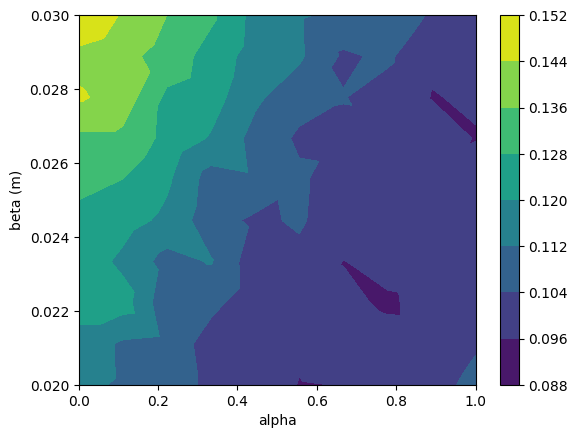

In [2]:
results = pd.read_pickle("ab_sweep_results_1.pkl")
fig, ax = plt.subplots()
cont = ax.tricontourf(results["alpha"], results["beta"], results["xemit"], cmap="viridis")
ax.set_xlabel("alpha")
ax.set_ylabel("beta (m)")
plt.colorbar(cont)
plt.show()

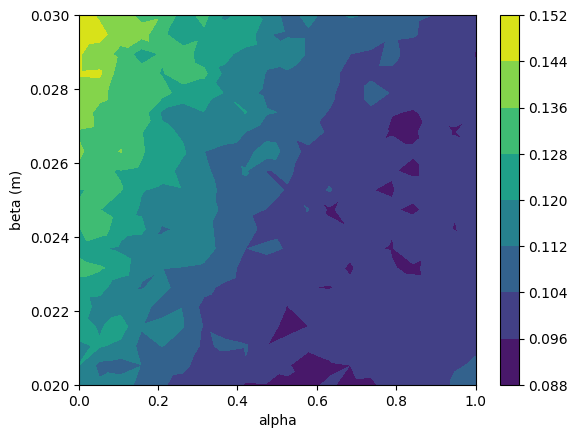

In [6]:
results = pd.read_pickle("ab_sweep_results.pkl")
fig, ax = plt.subplots()
cont = ax.tricontourf(results["alpha"], results["beta"], results["xemit"], cmap="viridis")
ax.set_xlabel("alpha")
ax.set_ylabel("beta (m)")
plt.colorbar(cont)
plt.show()

# Scan wedge length (old)

In [11]:
results = list()
lengths = np.linspace(15, 45, 30)
BETA = .027  # centimeter to meter conversion!
ALPHA = 0.4
ANGLE = 45

In [12]:
for l in tqdm(lengths):
    before = gen_distribution((BETA, ALPHA, 0.145, 0, 0), (BETA, ALPHA, 0.145, 0, 0), 120, 1, z_emit=1)
    after = run_distribution(before, l, ANGLE)
    results.append([l] + list(emittances(after)) + [after["Pz"].mean()])
results = pd.DataFrame(results, columns=["length", "xemit", "yemit", "zemit", "meanPz"])
print(results)
results.to_pickle("length_sweep_long.pkl")

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [07:23<00:00, 14.78s/it]

       length     xemit     yemit     zemit     meanPz
0   15.000000  0.058405  0.169702  5.696204  99.219514
1   16.034483  0.064215  0.174802  6.023262  97.553466
2   17.068966  0.068639  0.180787  6.167631  96.042487
3   18.103448  0.064514  0.185436  6.401034  94.058563
4   19.137931  0.067986  0.192550  6.657040  92.443973
5   20.172414  0.067502  0.196379  6.802299  90.818315
6   21.206897  0.067669  0.210296  7.234395  88.812490
7   22.241379  0.073208  0.213341  7.271942  86.844834
8   23.275862  0.076189  0.227868  7.558258  84.824134
9   24.310345  0.076309  0.229782  7.594352  82.979793
10  25.344828  0.081037  0.245171  7.725015  80.948072
11  26.379310  0.085888  0.259126  7.692789  78.809752
12  27.413793  0.091943  0.263107  7.483272  76.982194
13  28.448276  0.094029  0.286234  7.372467  74.930896
14  29.482759  0.099169  0.301010  7.236701  73.209911
15  30.517241  0.100027  0.306185  7.051655  71.584142
16  31.551724  0.109874  0.320146  6.740519  69.998478
17  32.586

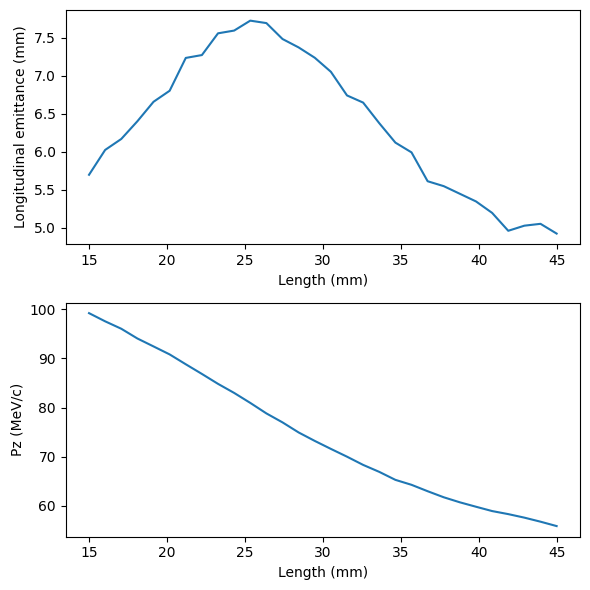

In [19]:
results = pd.read_pickle("length_sweep_long.pkl")
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(6, 6)
ax1, ax2 = tuple(axes)
ax1.plot(results["length"], results["zemit"])
ax1.set_xlabel("Length (mm)")
ax1.set_ylabel("Longitudinal emittance (mm)")
ax2.plot(results["length"], results["meanPz"])
ax2.set_xlabel("Length (mm)")
ax2.set_ylabel("Pz (MeV/c)")
fig.tight_layout()

In [78]:
# Sweep angle

In [ ]:
results = list()
angles = np.linspace(5, 35, 30)
BETA = .27  # centimeter to meter conversion!
ALPHA = 0.4
LENGTH = 3
T_EMIT = 0.145
L_EMIT = 1

In [ ]:
for a in tqdm(angles):
    before = gen_distribution((BETA, ALPHA, T_EMIT, 0, 0), (BETA, ALPHA, T_EMIT, 0, 0), 120, 1, z_emit=L_EMIT)
    after = cut_outliers(run_distribution(before, LENGTH, a))
    results.append([a] + list(emittances(after)))
results = pd.DataFrame(results, columns=["angle", "xemit", "yemit", "zemit"])
results.to_pickle("angle_sweep.pkl")

Text(0, 0.5, 'Transverse emittance in X (mm)')

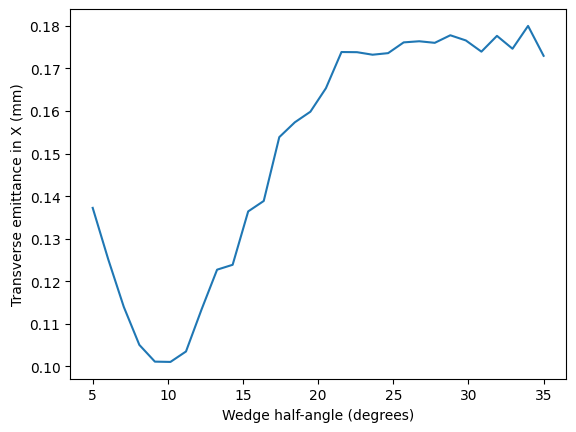

In [59]:
results = pd.read_pickle("angle_sweep.pkl")
fig, ax = plt.subplots()
ax.plot(results["angle"], results["xemit"])
ax.set_xlabel("Wedge half-angle (degrees)")
ax.set_ylabel("Transverse emittance in X (mm)")

In [ ]:
# def run_test(beta, alpha, t_emit, l_emit, p_mean = 120, p_std = 1):
#     # Runs a test of the type I repeatedly run.
#     before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), p_mean, p_std, z_emit=l_emit)
#     after = cut_outliers(run_distribution(before, w, a))

# Scan angle over various widths (old)

In [3]:
results = list()
angles = np.linspace(5, 65, 60)
lengths = [3, 6, 12, 24, 36]
BETA = .027  # centimeter to meter conversion!
ALPHA = 0.4
T_EMIT = 0.145
L_EMIT = 1

In [83]:
for w in lengths:
    for a in tqdm(angles):
        before = gen_distribution((BETA, ALPHA, T_EMIT, 0, 0), (BETA, ALPHA, T_EMIT, 0, 0), 120, 1, z_emit=L_EMIT)
        after = cut_outliers(run_distribution(before, w, a))
        results.append([w, a] + list(emittances(after)))
results = pd.DataFrame(results, columns=["length", "angle", "xemit", "yemit", "zemit"])
print(results)
results.to_pickle("angle_sweep_lengths_2.pkl")

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [13:36<00:00, 13.61s/it]

     length      angle     xemit     yemit      zemit
0         3   5.000000  0.141162  0.145094   1.396922
1         3   6.016949  0.137959  0.147280   1.399932
2         3   7.033898  0.135672  0.147746   1.436619
3         3   8.050847  0.129891  0.147516   1.462005
4         3   9.067797  0.127869  0.144638   1.457966
..      ...        ...       ...       ...        ...
295      36  60.932203  0.100624  0.383882  10.000694
296      36  61.949153  0.098528  0.376511  10.277682
297      36  62.966102  0.093820  0.372152  10.588695
298      36  63.983051  0.099249  0.383541  11.391596
299      36  65.000000  0.103473  0.375658  11.648464

[300 rows x 5 columns]


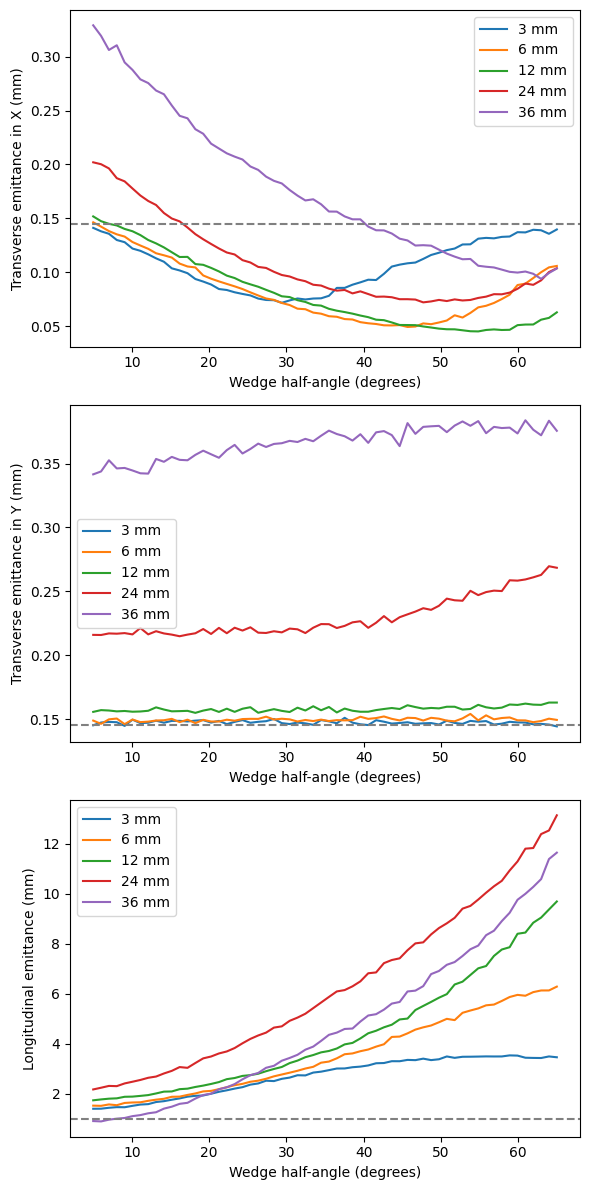

In [4]:
results = pd.read_pickle("angle_sweep_lengths_2.pkl")
fig, axes = plt.subplots(nrows = 3)
fig.set_size_inches(6, 12)
ax1, ax2, ax3 = tuple(axes)
for w in lengths:
    subresult = results[results["length"] == w]
    ax1.plot(subresult["angle"], subresult["xemit"], label=f"{w} mm")
    ax2.plot(subresult["angle"], subresult["yemit"], label=f"{w} mm")
    ax3.plot(subresult["angle"], subresult["zemit"], label=f"{w} mm")
ax1.set_ylabel("Transverse emittance in X (mm)")
ax2.set_ylabel("Transverse emittance in Y (mm)")
ax3.set_ylabel("Longitudinal emittance (mm)")
ax1.set_xlabel("Wedge half-angle (degrees)")
ax2.set_xlabel("Wedge half-angle (degrees)")
ax3.set_xlabel("Wedge half-angle (degrees)")
ax1.axhline(T_EMIT, color='gray', linestyle="--")
ax2.axhline(T_EMIT, color='gray', linestyle="--")
ax3.axhline(L_EMIT, color='gray', linestyle="--")
ax1.legend()
ax2.legend()
ax3.legend()
fig.tight_layout()

# Scan angle over various widths

Changing the zoom a bit, using the fixed base length, and storing full data

In [5]:
results = list()
angles = np.linspace(5, 65, 30)
lengths = [6, 9, 12, 15, 18]
BETA = .027  # centimeter to meter conversion!
ALPHA = 0.4
T_EMIT = 0.145
L_EMIT = 1

In [9]:
for w in lengths:
    for a in tqdm(angles):
        before = gen_distribution((BETA, ALPHA, T_EMIT, 0, 0), (BETA, ALPHA, T_EMIT, 0, 0), 120, 1, z_emit=L_EMIT)
        after = run_distribution(before, w, a, 40)
        results.append((w, a, after))
with open("results/angle_scan_width_data.pkl", "wb+") as file:
    pickle.dump((angles, lengths, results), file)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [04:28<00:00,  8.96s/it]


TypeError: write() argument must be str, not bytes

In [18]:
# Data surgery cell: opens and resaves to make emergency corrections to data
with open("results/angle_scan_width_data.pkl", "rb") as file:
    angles, lengths, results = pickle.load(file)
# SURGERY HERE
with open("results/angle_scan_width_data.pkl", "wb+") as file:
    pickle.dump((angles, lengths, results), file)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:03<00:00, 41.15it/s]


Cut fraction: 0.309556%


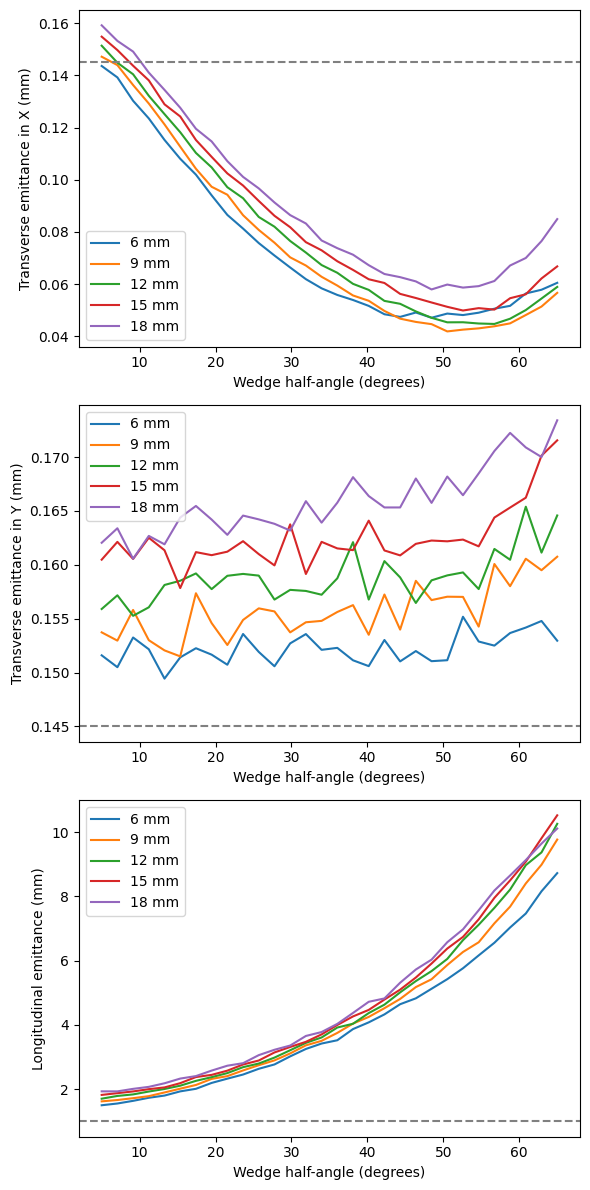

In [11]:
with open("results/angle_scan_width_data.pkl", "rb") as file:
    angles, lengths, results = pickle.load(file)
results_post = list()
for w, a, after in tqdm(results):
    after = cut_outliers(after, 4)
    x_emit, y_emit, z_emit = emittances(after)
    results_post.append([w, a] + [x_emit, y_emit, z_emit, len(after)])
results_post = pd.DataFrame(results_post, columns=["length", "angle", "xemit", "yemit", "zemit", "N"])

fig, axes = plt.subplots(nrows = 3)
fig.set_size_inches(6, 12)
ax1, ax2, ax3 = tuple(axes)
for w in lengths:
    subresult = results_post[results_post["length"] == w]
    ax1.plot(subresult["angle"], subresult["xemit"], label=f"{w} mm")
    ax2.plot(subresult["angle"], subresult["yemit"], label=f"{w} mm")
    ax3.plot(subresult["angle"], subresult["zemit"], label=f"{w} mm")
ax1.set_ylabel("Transverse emittance in X (mm)")
ax2.set_ylabel("Transverse emittance in Y (mm)")
ax3.set_ylabel("Longitudinal emittance (mm)")
ax1.set_xlabel("Wedge half-angle (degrees)")
ax2.set_xlabel("Wedge half-angle (degrees)")
ax3.set_xlabel("Wedge half-angle (degrees)")
ax1.axhline(T_EMIT, color='gray', linestyle="--")
ax2.axhline(T_EMIT, color='gray', linestyle="--")
ax3.axhline(L_EMIT, color='gray', linestyle="--")
ax1.legend()
ax2.legend()
ax3.legend()
fig.tight_layout()
cut_frac = (12000-np.mean(results_post["N"]))/12000
print(f"Cut fraction: {cut_frac:%}")

# Scan length over various angles

In [75]:
# Setup
results = list()
lengths = np.linspace(6, 36, 30)
angles = [5, 15, 25, 35, 45, 55, 65]
BETA = .27  # centimeter to meter conversion!
ALPHA = 0.4
T_EMIT = 0.145
L_EMIT = 1

In [61]:
# Running
for a in angles:
    for w in tqdm(lengths):
        before = gen_distribution((BETA, ALPHA, T_EMIT, 0, 0), (BETA, ALPHA, T_EMIT, 0, 0), 120, 1, z_emit=L_EMIT)
        after = cut_outliers(run_distribution(before, w, a))
        results.append([w, a] + list(emittances(after)))
results = pd.DataFrame(results, columns=["length", "angle", "xemit", "yemit", "zemit"])
print(results)
results.to_pickle("length_sweep_angles.pkl")

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [04:34<00:00,  9.16s/it]

       length  angle     xemit     yemit      zemit
0    6.000000      5  0.174590  0.237752   1.732942
1    7.034483      5  0.187242  0.251724   1.808306
2    8.068966      5  0.196481  0.268254   1.848544
3    9.103448      5  0.205466  0.277234   1.830237
4   10.137931      5  0.217612  0.290069   1.883503
..        ...    ...       ...       ...        ...
85  31.862069     65  0.198775  0.471725  16.619308
86  32.896552     65  0.193832  0.463662  16.651828
87  33.931034     65  0.190483  0.473584  16.619937
88  34.965517     65  0.176440  0.469292  15.981921
89  36.000000     65  0.170084  0.475029  16.022160

[90 rows x 5 columns]


In [64]:
# Run to add previous result
# prev_results = pd.read_pickle("length_sweep_angles.pkl")
# results = pd.concat([prev_results, results])
# results.to_pickle("length_sweep_angles.pkl")

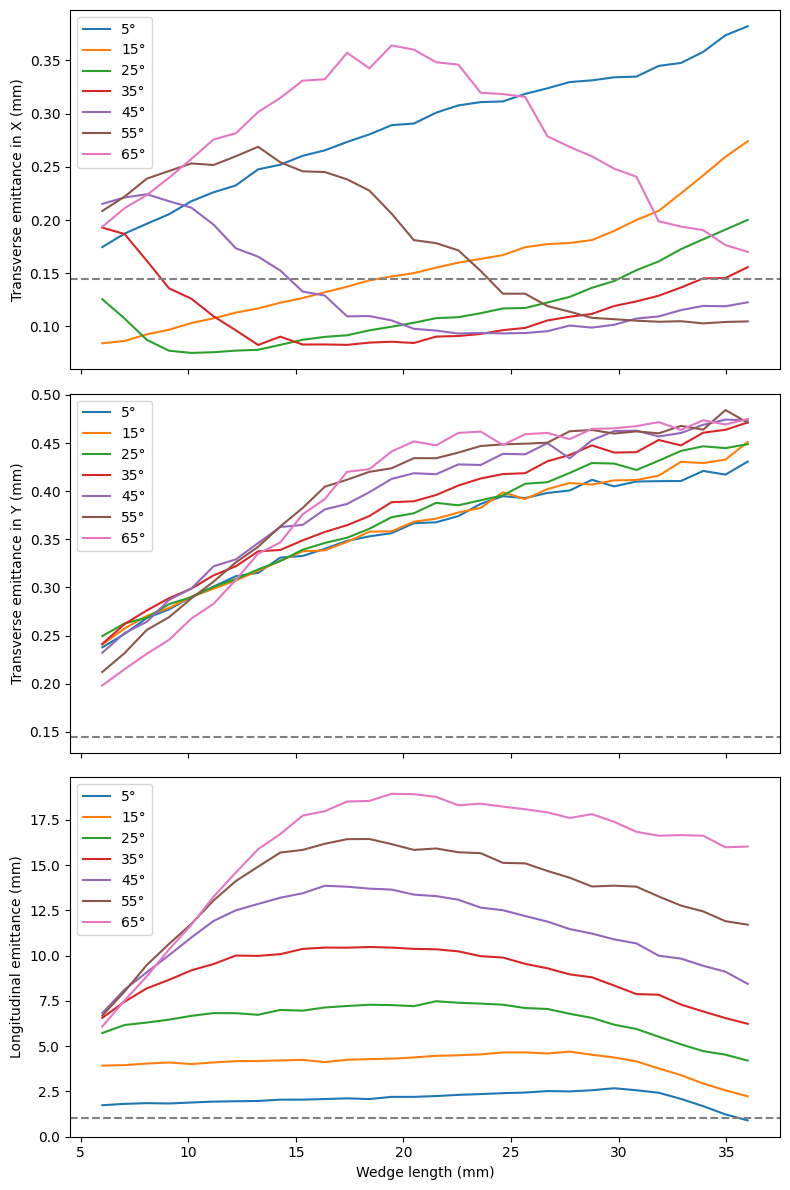

In [70]:
# Display
results = pd.read_pickle("length_sweep_angles.pkl")
fig, axes = plt.subplots(nrows = 3, sharex=True)
fig.set_size_inches(8, 12)
ax1, ax2, ax3 = tuple(axes)
for a in angles:
    subresult = results[results["angle"] == a]
    ax1.plot(subresult["length"], subresult["xemit"], label=f"{a}°")
    ax2.plot(subresult["length"], subresult["yemit"], label=f"{a}°")
    ax3.plot(subresult["length"], subresult["zemit"], label=f"{a}°")
ax1.set_ylabel("Transverse emittance in X (mm)")
ax2.set_ylabel("Transverse emittance in Y (mm)")
ax3.set_ylabel("Longitudinal emittance (mm)")
ax1.axhline(T_EMIT, color='gray', linestyle="--")
ax2.axhline(T_EMIT, color='gray', linestyle="--")
ax3.axhline(L_EMIT, color='gray', linestyle="--")
# ax1.axhline(T_EMIT, color='gray', linestyle="--", label="original")
# ax2.axhline(T_EMIT, color='gray', linestyle="--", label="original")
# ax3.axhline(L_EMIT, color='gray', linestyle="--", label="original")
ax1.legend()
ax2.legend()
ax3.legend()
ax3.set_xlabel("Wedge length (mm)")
fig.tight_layout()

Text(0.5, 1.0, 'Length scan with various angles')

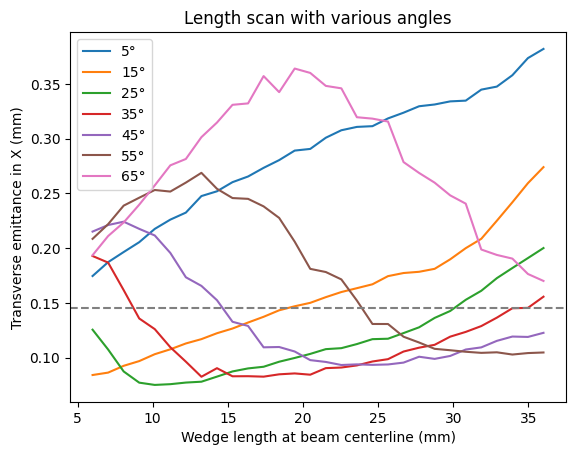

In [77]:
results = pd.read_pickle("length_sweep_angles.pkl")
fig, ax = plt.subplots()
for a in angles:
    subresult = results[results["angle"] == a]
    ax.plot(subresult["length"], subresult["xemit"], label=f"{a}°")
ax.set_xlabel("Wedge length at beam centerline (mm)")
ax.set_ylabel("Transverse emittance in X (mm)")
ax.axhline(T_EMIT, color='gray', linestyle="--")
ax.legend()
ax.set_title("Length scan with various angles")

# Effect of alpha

In [15]:
# Ranges to scan
angles = np.linspace(40, 60, 30)
lengths = [6, 7.5, 9, 10.5, 12]
alphas = [0, 0.4, 0.7]
# Constants
BETA = .027
MOMENTUM = 120
PZ_STD = 1
T_EMIT = 0.145
L_EMIT = 1

In [25]:
# Run simulations
results = list()
trials = list(itertools.product(angles, lengths, alphas))
for angle, length, alpha in tqdm(trials):
    before = gen_distribution((BETA, alpha, T_EMIT, 0, 0), (BETA, alpha, T_EMIT, 0, 0), MOMENTUM, PZ_STD, z_emit=L_EMIT)
    after = run_distribution(before, length, angle, 24)
    results.append((angle, length, alpha, after))
with open("results/angle_scan_width_alpha_data.pkl", "wb+") as file:
    pickle.dump(results, file)

100%|████████████████████████████████████████████████████████████████████████████████| 450/450 [52:25<00:00,  6.99s/it]


In [35]:
# Process results
with open("results/angle_scan_width_alpha_data.pkl", "rb") as file:
    results = pickle.load(file)
results_post = list()
for angle, length, alpha, after in tqdm(results):
    after = cut_outliers(after, 3.5)
    x_emit, y_emit, z_emit = emittances(after)
    results_post.append([angle, length, alpha] + [x_emit, y_emit, z_emit, len(after)])
results_post = pd.DataFrame(results_post, columns=["angle", "length", "alpha", "xemit", "yemit", "zemit", "N"])

100%|████████████████████████████████████████████████████████████████████████████████| 450/450 [00:04<00:00, 92.70it/s]


Cut fraction: 0.482500%


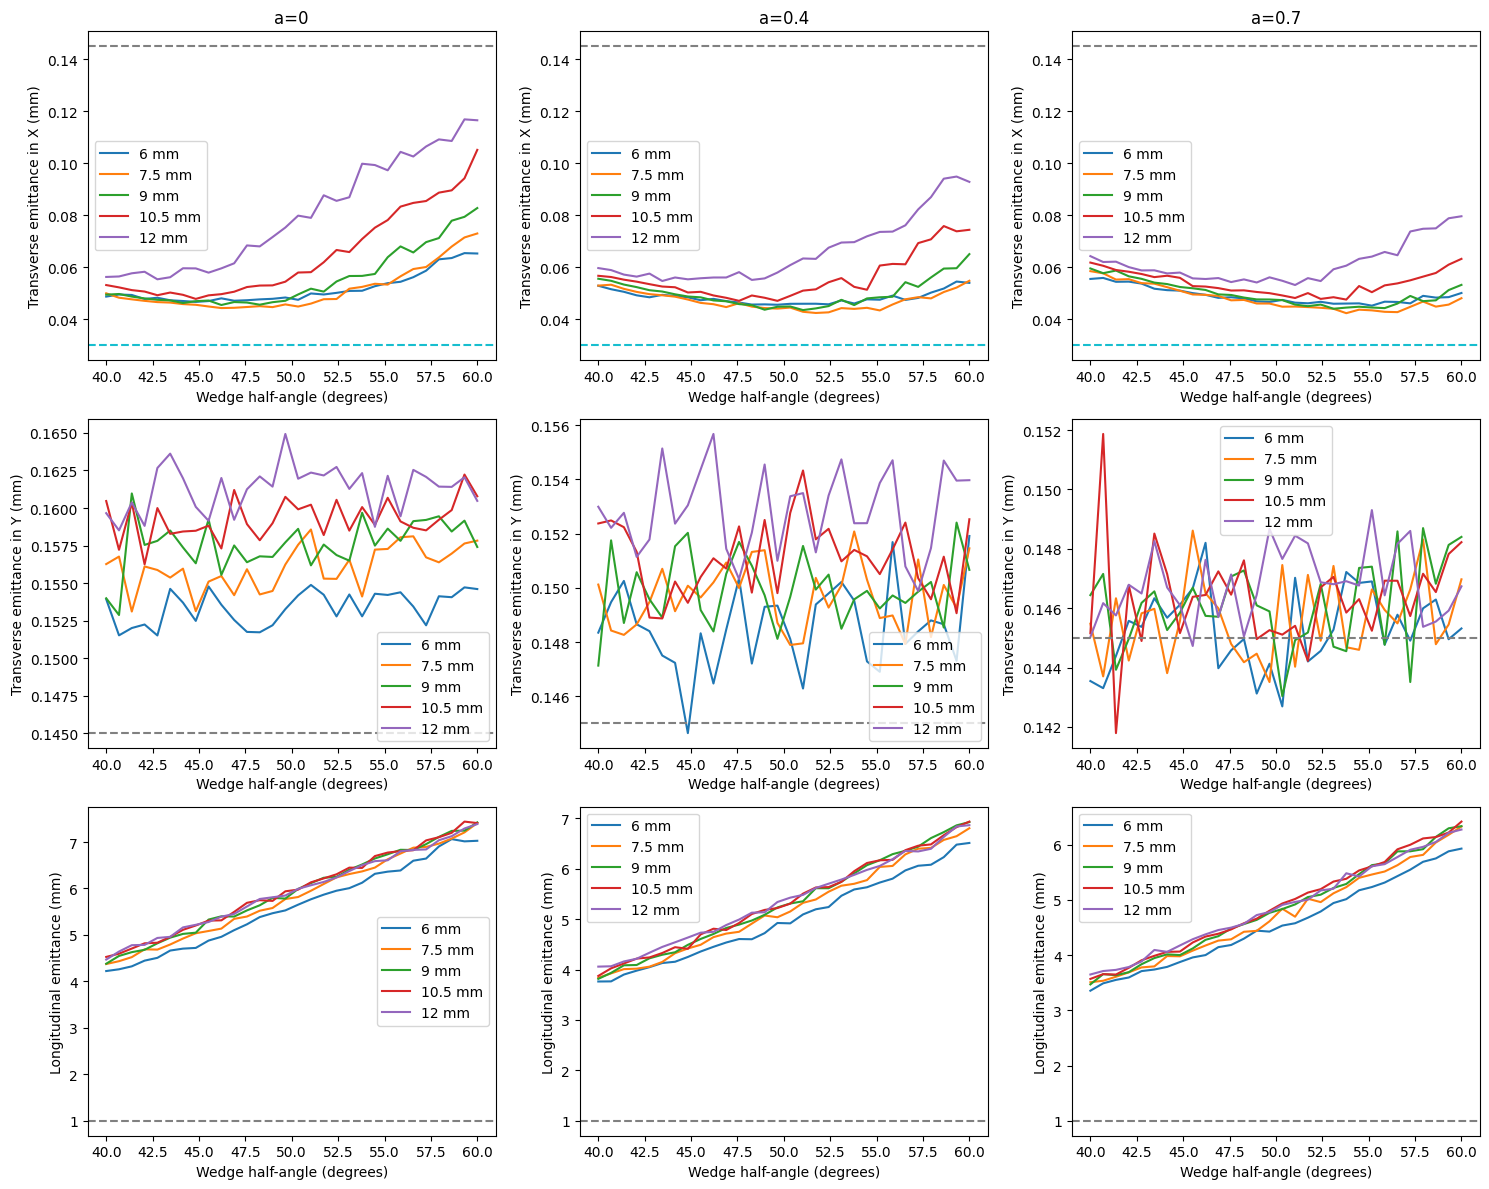

In [36]:
# Graph results
fig, axs = plt.subplots(nrows = 3, ncols = 3)
fig.set_size_inches(15, 12)
for i, alpha in enumerate(alphas):
    for w in lengths:
        subresult = results_post[(results_post["length"] == w) & (results_post["alpha"] == alpha)]
        for j, x in enumerate(["xemit", "yemit", "zemit"]):
            axs[j][i].plot(subresult["angle"], subresult[x], label=f"{w} mm")
            axs[j][i].legend()
    axs[0][i].set_ylabel("Transverse emittance in X (mm)")
    axs[1][i].set_ylabel("Transverse emittance in Y (mm)")
    axs[2][i].set_ylabel("Longitudinal emittance (mm)")
    axs[0][i].set_xlabel("Wedge half-angle (degrees)")
    axs[1][i].set_xlabel("Wedge half-angle (degrees)")
    axs[2][i].set_xlabel("Wedge half-angle (degrees)")
    axs[0][i].axhline(T_EMIT, color='gray', linestyle="--")
    axs[0][i].axhline(0.03, color='tab:cyan', linestyle="--")
    axs[1][i].axhline(T_EMIT, color='gray', linestyle="--")
    axs[2][i].axhline(L_EMIT, color='gray', linestyle="--")
    axs[0][i].set_title(f"a={alpha}")
fig.tight_layout()
cut_frac = (12000-np.mean(results_post["N"]))/12000
print(f"Cut fraction: {cut_frac:%}")

## Detailed scan on single length

In [76]:
# Ranges to scan
angles = np.linspace(15, 75, 30)
alphas = [-0.5, 0, 0.5, 1, 1.5]
# Constants
beta = .030
momentum = 100
length = 7.5
pz_std = 1
t_emit = 0.145
l_emit = 1

In [77]:
# Run simulations
results = list()
trials = list(itertools.product(angles, alphas))
for angle, alpha in tqdm(trials):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, length, angle, 24)
    results.append((angle, alpha, after))
with open("results/angle_scan_alpha.pkl", "wb+") as file:
    pickle.dump(results, file)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [16:58<00:00,  6.79s/it]


In [78]:
# Process results
with open("results/angle_scan_alpha.pkl", "rb") as file:
    results = pickle.load(file)
results_post = list()
for angle, alpha, after in tqdm(results):
    after = cut_outliers(after, 4)
    x_emit, y_emit, z_emit = emittances(after)
    results_post.append([angle, alpha] + [x_emit, y_emit, z_emit, len(after)])
results_post = pd.DataFrame(results_post, columns=["angle", "alpha", "xemit", "yemit", "zemit", "N"])

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 92.53it/s]


Cut fraction: 0.237611%


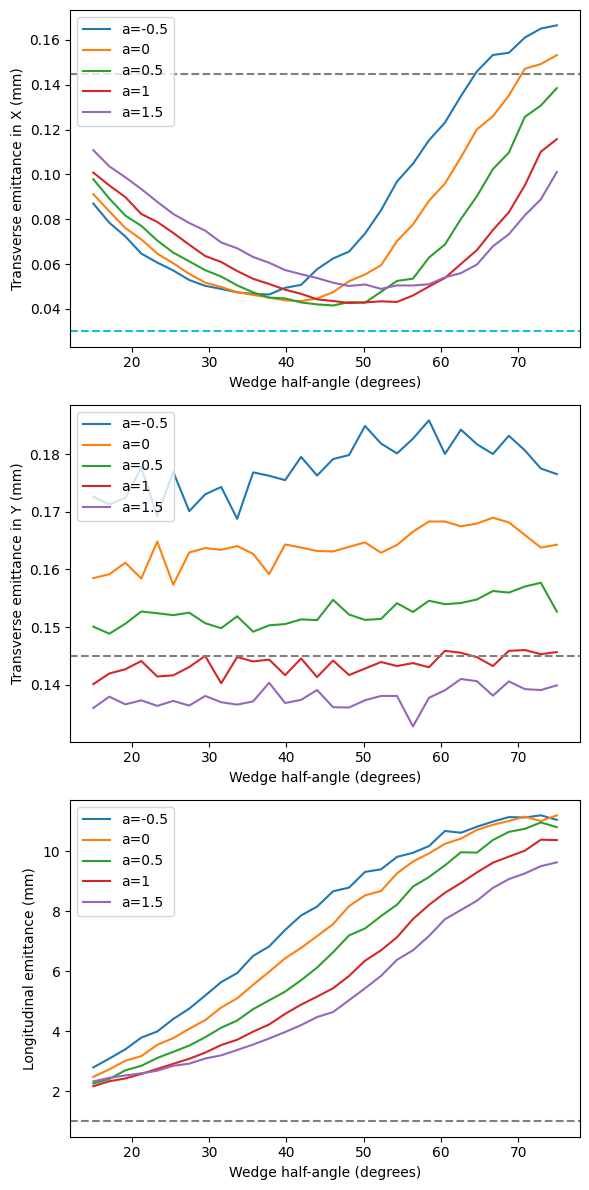

In [80]:
# Show lengths
fig, axes = plt.subplots(nrows = 3)
fig.set_size_inches(6, 12)
ax1, ax2, ax3 = tuple(axes)
for a in alphas:
    subresult = results_post[results_post["alpha"] == a]
    ax1.plot(subresult["angle"], subresult["xemit"], label=f"a={a}")
    ax2.plot(subresult["angle"], subresult["yemit"], label=f"a={a}")
    ax3.plot(subresult["angle"], subresult["zemit"], label=f"a={a}")
ax1.set_ylabel("Transverse emittance in X (mm)")
ax2.set_ylabel("Transverse emittance in Y (mm)")
ax3.set_ylabel("Longitudinal emittance (mm)")
ax1.set_xlabel("Wedge half-angle (degrees)")
ax2.set_xlabel("Wedge half-angle (degrees)")
ax3.set_xlabel("Wedge half-angle (degrees)")
ax1.axhline(t_emit, color='gray', linestyle="--")
ax1.axhline(0.03, color='tab:cyan', linestyle="--")
ax2.axhline(t_emit, color='gray', linestyle="--")
ax3.axhline(l_emit, color='gray', linestyle="--")
ax1.legend()
ax2.legend()
ax3.legend()
fig.tight_layout()
cut_frac = (12000-np.mean(results_post["N"]))/12000
print(f"Cut fraction: {cut_frac:%}")

# Effect of beta

In [31]:
# Ranges to scan
angles = np.linspace(40, 60, 30)
lengths = [4.5, 6, 7.5, 9, 10.5]
betas = [0.024, 0.027, 0.03, 0.033, 0.037, 0.040, 0.043]
# betas = [0.037, 0.040, 0.043] # Values appended later
# Constants
alpha = 0.7
momentum = 120
pz_std = 1
t_emit = 0.145
l_emit = 1

In [30]:
# Run simulations
# results = list()
with open("results/angle_scan_beta.pkl", "rb") as file:
    results = pickle.load(file)

trials = list(itertools.product(angles, lengths, betas))
for angle, length, beta in tqdm(trials):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, length, angle, 24)
    results.append((angle, length, beta, after))
with open("results/angle_scan_beta.pkl", "wb+") as file:
    pickle.dump(results, file)

100%|████████████████████████████████████████████████████████████████████████████████| 450/450 [56:45<00:00,  7.57s/it]


In [32]:
# Process results
with open("results/angle_scan_beta.pkl", "rb") as file:
    results = pickle.load(file)
results_post = list()
for angle, length, beta, after in tqdm(results):
    after = cut_outliers(after, 3.5)
    x_emit, y_emit, z_emit = emittances(after)
    results_post.append([angle, length, beta] + [x_emit, y_emit, z_emit, len(after)])
results_post = pd.DataFrame(results_post, columns=["angle", "length", "beta", "xemit", "yemit", "zemit", "N"])
cut_frac = (12000-np.mean(results_post["N"]))/12000
print(f"Cut fraction: {cut_frac:%}")

100%|██████████████████████████████████████████████████████████████████████████████| 1050/1050 [00:12<00:00, 85.55it/s]

Cut fraction: 0.486063%


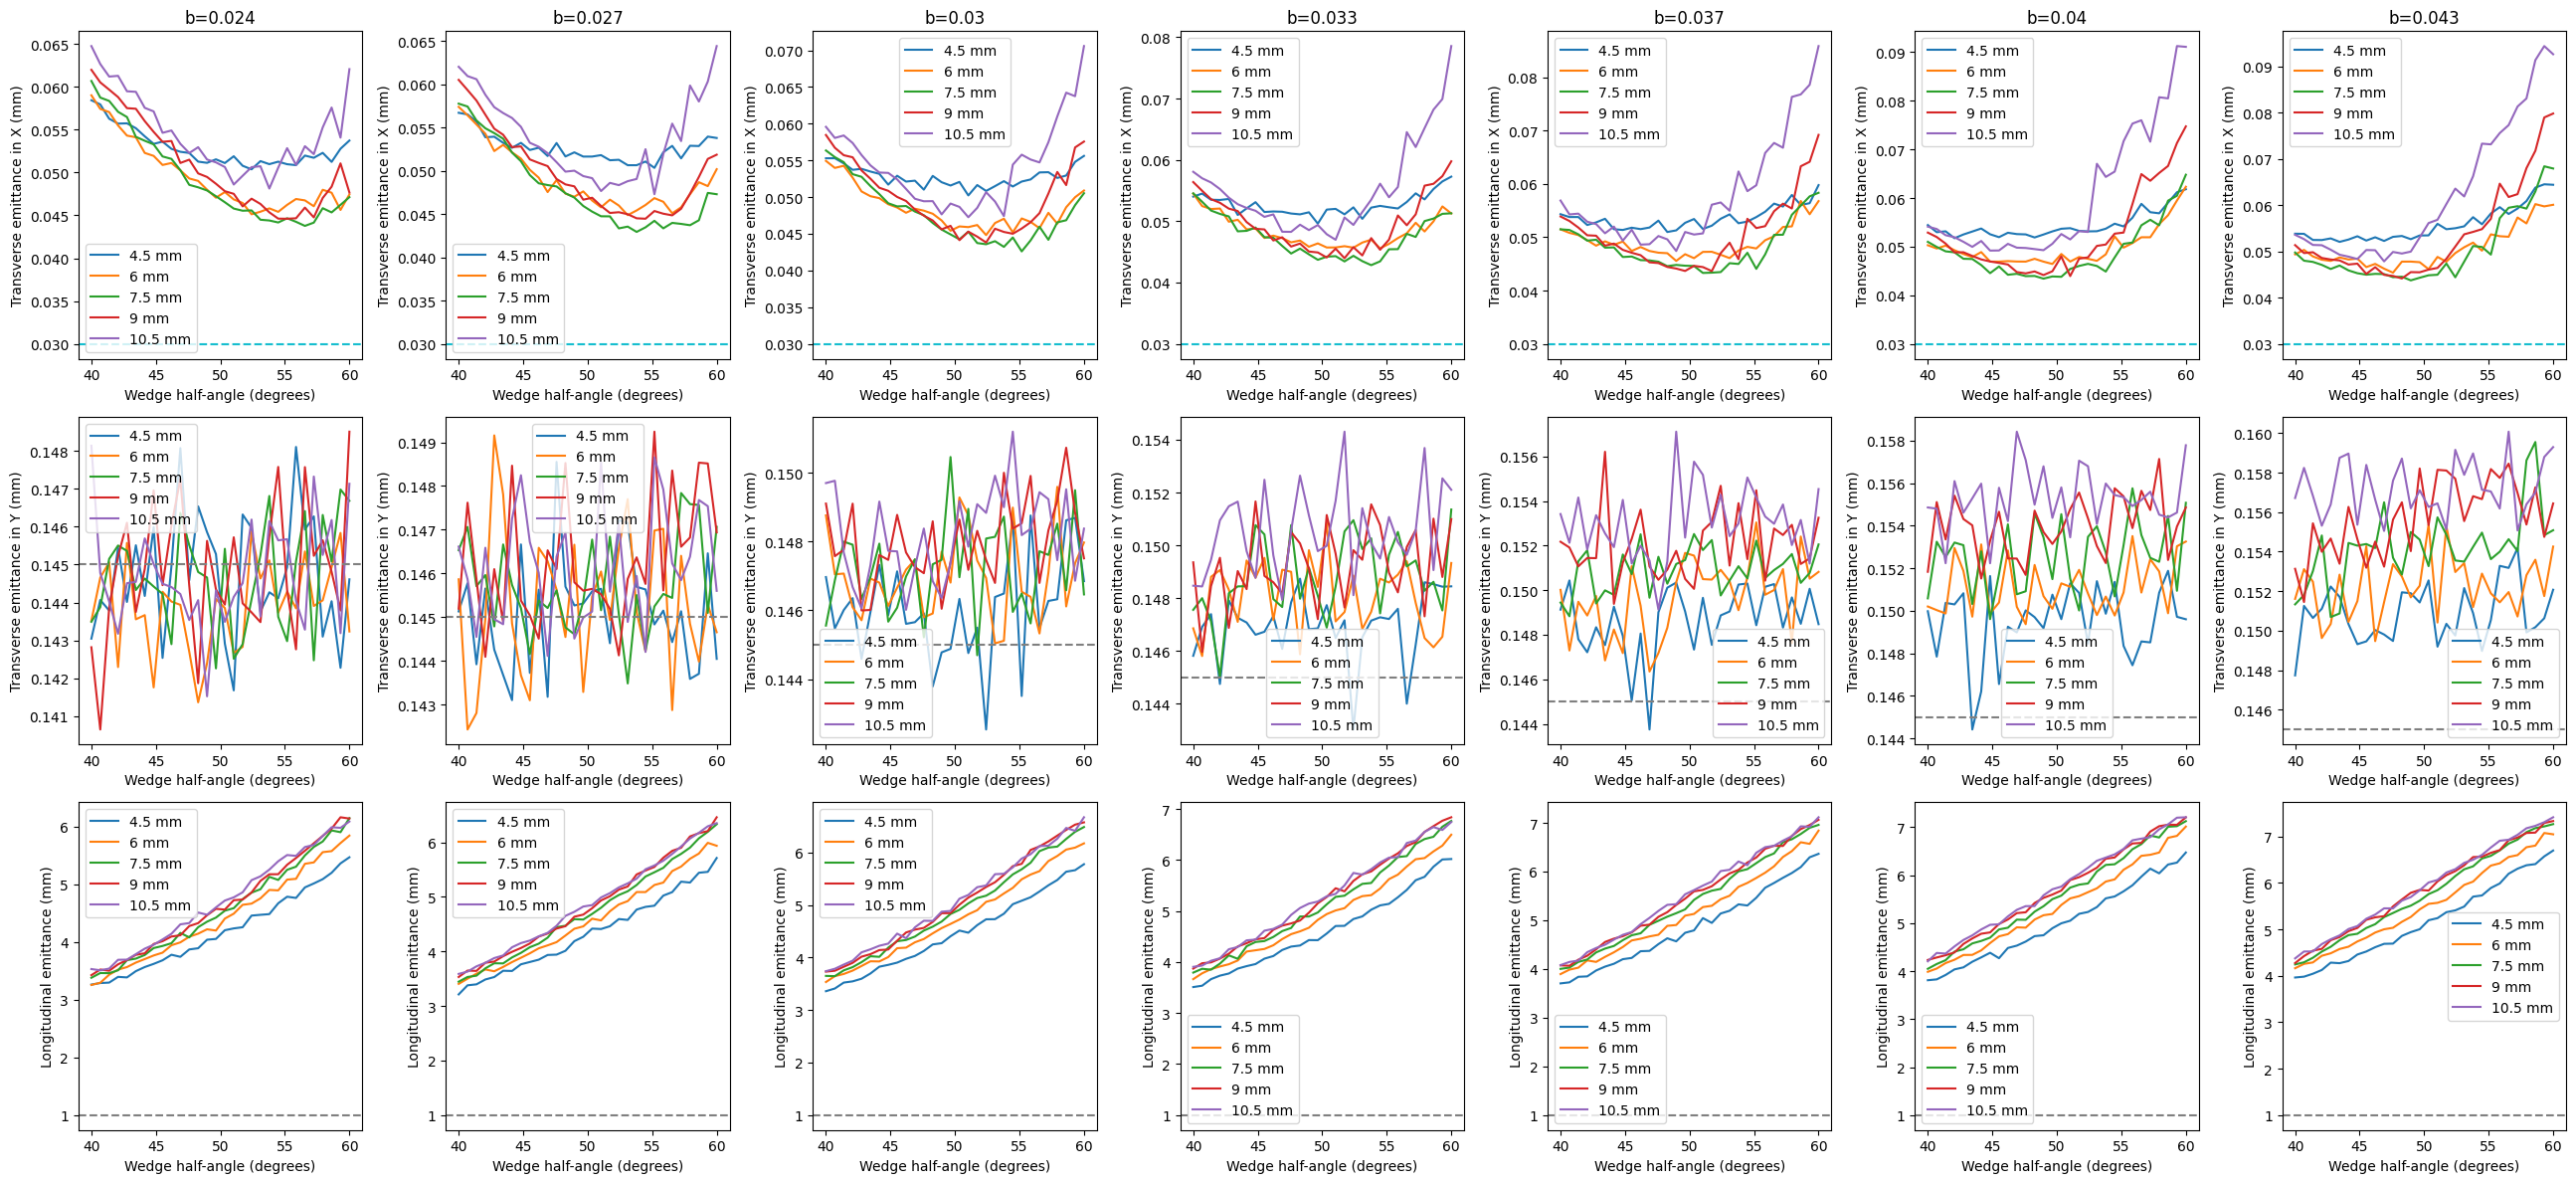

In [33]:
# Graph results
fig, axs = plt.subplots(nrows = 3, ncols = len(betas))
fig.set_size_inches(26, 12)
for i, beta in enumerate(betas):
    for w in lengths:
        subresult = results_post[(results_post["length"] == w) & (results_post["beta"] == beta)]
        for j, x in enumerate(["xemit", "yemit", "zemit"]):
            axs[j][i].plot(subresult["angle"], subresult[x], label=f"{w} mm")
            axs[j][i].legend()
    axs[0][i].set_ylabel("Transverse emittance in X (mm)")
    axs[1][i].set_ylabel("Transverse emittance in Y (mm)")
    axs[2][i].set_ylabel("Longitudinal emittance (mm)")
    axs[0][i].set_xlabel("Wedge half-angle (degrees)")
    axs[1][i].set_xlabel("Wedge half-angle (degrees)")
    axs[2][i].set_xlabel("Wedge half-angle (degrees)")
    # axs[0][i].axhline(t_emit, color='gray', linestyle="--")
    axs[0][i].axhline(0.03, color='tab:cyan', linestyle="--")
    axs[1][i].axhline(t_emit, color='gray', linestyle="--")
    axs[2][i].axhline(l_emit, color='gray', linestyle="--")
    axs[0][i].set_title(f"b={beta}")
fig.tight_layout()

In [34]:
# Table of minimums

minima = [results_post[results_post["beta"] == beta]["xemit"].idxmin() for beta in betas]
minima_df = results_post.iloc[minima].set_index("beta")
minima_df[["angle", "length", "xemit", "yemit", "zemit"]]

angle  length     xemit     yemit     zemit
beta                                                  
0.024  56.551724     7.5  0.043774  0.146411  5.496119
0.027  53.793103     7.5  0.042941  0.145505  5.217424
0.030  55.172414     7.5  0.042606  0.146490  5.682827
0.033  53.793103     7.5  0.042838  0.150263  5.551688
0.037  51.034483     7.5  0.043310  0.151803  5.539679
0.040  48.965517     7.5  0.043424  0.153455  5.353603
0.043  48.965517     7.5  0.043747  0.154994  5.510028

# Effect of momentum

Just a rough scan

In [117]:
# Ranges to scan
angles = np.linspace(40, 60, 10)
lengths = [3, 6, 9, 12]
momentums = [100, 110, 120, 140]
# Constants
alpha = 0.7
beta = 0.027
pz_std = 1
t_emit = 0.145
l_emit = 1

In [73]:
# Run simulations
results = list()
trials = list(itertools.product(angles, lengths, momentums))
for angle, length, momentum in tqdm(trials):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, length, angle, 24)
    results.append((angle, length, momentum, after))
with open("results/angle_scan_momentum_rough.pkl", "wb+") as file:
    pickle.dump(results, file)

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [17:42<00:00,  6.64s/it]


In [113]:
# Process results
with open("results/angle_scan_momentum_rough.pkl", "rb") as file:
    results = pickle.load(file)
results_post = list()
for angle, length, momentum, after in tqdm(results):
    after = cut_outliers(after, 3.5)
    x_params, y_params, z_emit = calc_all_params(after)
    results_post.append([angle, length, momentum] + list(x_params) + list(y_params) + [z_emit, len(after)])
results_post = pd.DataFrame(results_post, columns=["angle", "length", "momentum"] + ["x"+x for x in PARAMS] + ["y"+x for x in PARAMS] + ["zemit", "N"])
cut_frac = (12000-np.mean(results_post["N"]))/12000
print(f"Cut fraction: {cut_frac:%}")

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [00:01<00:00, 91.68it/s]

Cut fraction: 0.506979%


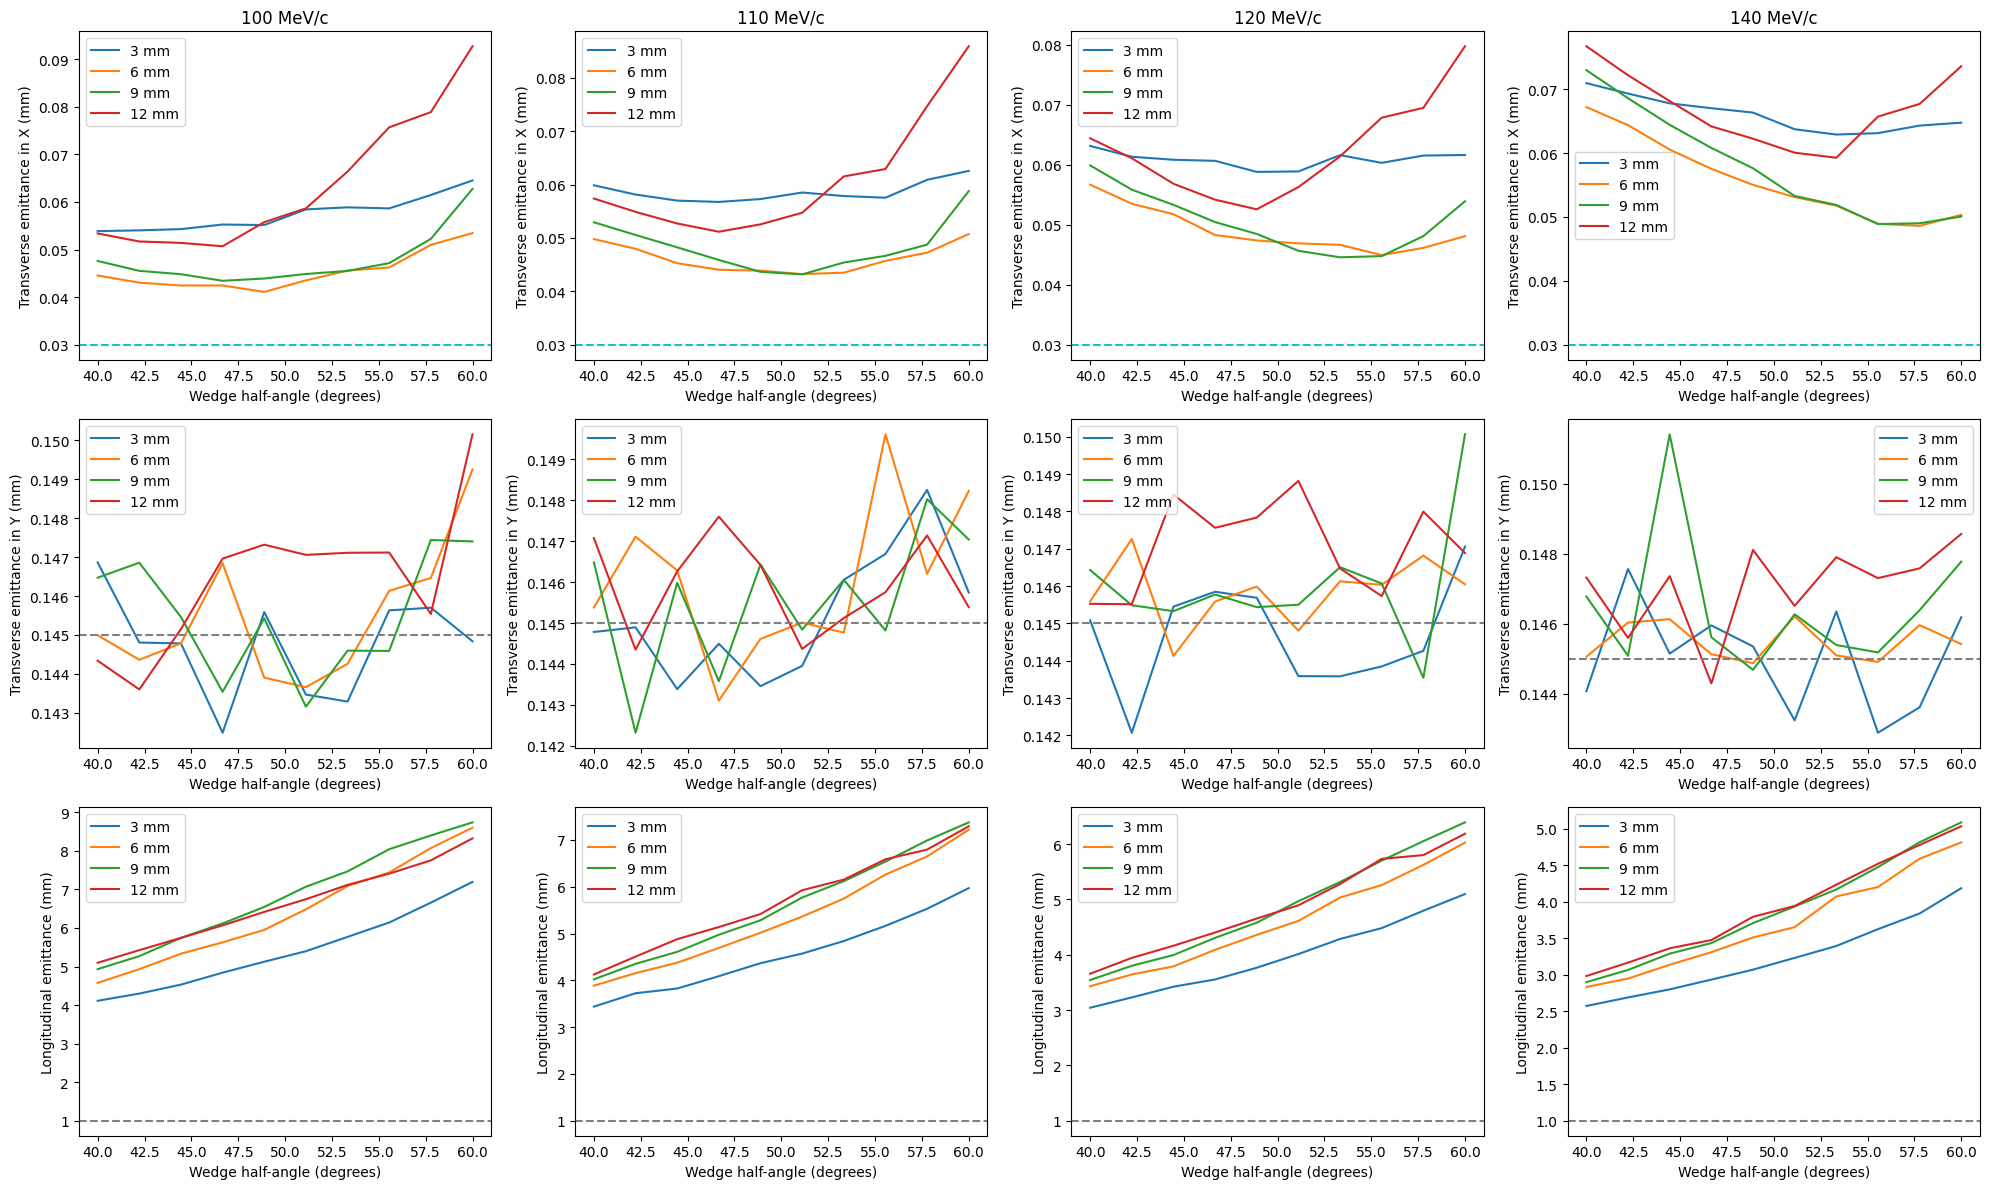

In [122]:
# Graph results
fig, axs = plt.subplots(nrows = 3, ncols = len(momentums))
fig.set_size_inches(20, 12)
for i, momentum in enumerate(momentums):
    for w in lengths:
        subresult = results_post[(results_post["length"] == w) & (results_post["momentum"] == momentum)]
        for j, x in enumerate(["xemit", "yemit", "zemit"]):
            axs[j][i].plot(subresult["angle"], subresult[x], label=f"{w} mm")
            axs[j][i].legend()
    axs[0][i].set_ylabel("Transverse emittance in X (mm)")
    axs[1][i].set_ylabel("Transverse emittance in Y (mm)")
    axs[2][i].set_ylabel("Longitudinal emittance (mm)")
    for j in range(3):
        axs[j][i].set_xlabel("Wedge half-angle (degrees)")
    # axs[0][i].axhline(t_emit, color='gray', linestyle="--")
    axs[0][i].axhline(0.03, color='tab:cyan', linestyle="--")
    axs[1][i].axhline(t_emit, color='gray', linestyle="--")
    axs[2][i].axhline(l_emit, color='gray', linestyle="--")
    axs[0][i].set_title(f"{momentum} MeV/c")
fig.tight_layout()

## Full scan

In [36]:
# Ranges to scan
angles = np.linspace(40, 60, 20)
lengths = [6, 7, 8, 9]
momentums = [100, 110, 120, 140]
# Constants
alpha = 0.7
beta = 0.027
pz_std = 1
t_emit = 0.145
l_emit = 1

In [101]:
# Run simulations
results = list()
trials = list(itertools.product(angles, lengths, momentums))
for angle, length, momentum in tqdm(trials):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, length, angle, 24)
    results.append((angle, length, momentum, after))
with open("results/angle_scan_momentum_rough2.pkl", "wb+") as file:
    pickle.dump(results, file)
beep()

100%|████████████████████████████████████████████████████████████████████████████████| 320/320 [35:14<00:00,  6.61s/it]


In [6]:
# Run with no wedge as comparison
results = list()
for momentum in tqdm(momentums):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, 7, 45, 24, filename = "G4_FinalCooling_auto_nowedge.g4bl")
    results.append((momentum, after))
with open("results/momentum_nowedge.pkl", "wb+") as file:
    pickle.dump(results, file)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:23<00:00,  5.75s/it]


In [37]:
# Process results
with open("results/angle_scan_momentum_rough2.pkl", "rb") as file:
    results = pickle.load(file)
results_post = list()
for angle, length, momentum, after in tqdm(results):
    after = cut_outliers(after, 3.5)
    x_params, y_params, z_emit = calc_all_params(after)
    results_post.append([angle, length, momentum] + list(x_params) + list(y_params) + [z_emit, len(after)])
results_post = pd.DataFrame(results_post, columns=["angle", "length", "momentum"] + ["x"+x for x in PARAMS] + ["y"+x for x in PARAMS] + ["zemit", "N"])

# Process no-wedge results
with open("results/momentum_nowedge.pkl", "rb") as file:
    results = pickle.load(file)
nowedge_post = list()
for momentum, after in results:
    after = cut_outliers(after, 3.5)
    x_params, y_params, z_emit = calc_all_params(after)
    nowedge_post.append([momentum] + list(x_params) + list(y_params) + [z_emit, len(after)])
nowedge_post = pd.DataFrame(nowedge_post, columns=["momentum"] + ["x"+x for x in PARAMS] + ["y"+x for x in PARAMS] + ["zemit", "N"]).set_index("momentum")

cut_frac = (12000-np.mean(results_post["N"]))/12000
print(f"Cut fraction: {cut_frac:%}")

100%|████████████████████████████████████████████████████████████████████████████████| 320/320 [00:03<00:00, 81.45it/s]


Cut fraction: 0.466901%


In [28]:
nowedge_post

xemit     xbeta     xgamma    xalpha        xD       xDp  \
momentum                                                                
100       0.143795  0.027216  55.184467 -0.708462 -0.000442  0.169014   
110       0.143653  0.027151  55.194739 -0.706127  0.002321  0.195342   
120       0.142101  0.026845  54.614078 -0.682740 -0.000062 -0.062152   
140       0.145109  0.027139  54.861685 -0.699227 -0.000089  0.016619   

             yemit     ybeta     ygamma    yalpha        yD       yDp  \
momentum                                                                
100       0.143622  0.027170  54.423255 -0.691859 -0.001851  0.010568   
110       0.141730  0.027424  54.105078 -0.695539  0.000158  0.028986   
120       0.143481  0.026981  54.761792 -0.691052  0.000514 -0.024243   
140       0.145876  0.027063  55.371341 -0.706055  0.003148  0.013749   

             zemit      N  
momentum                   
100       1.277599  11936  
110       1.259687  11944  
120       1.267543  11935  
140       1.272409  11949

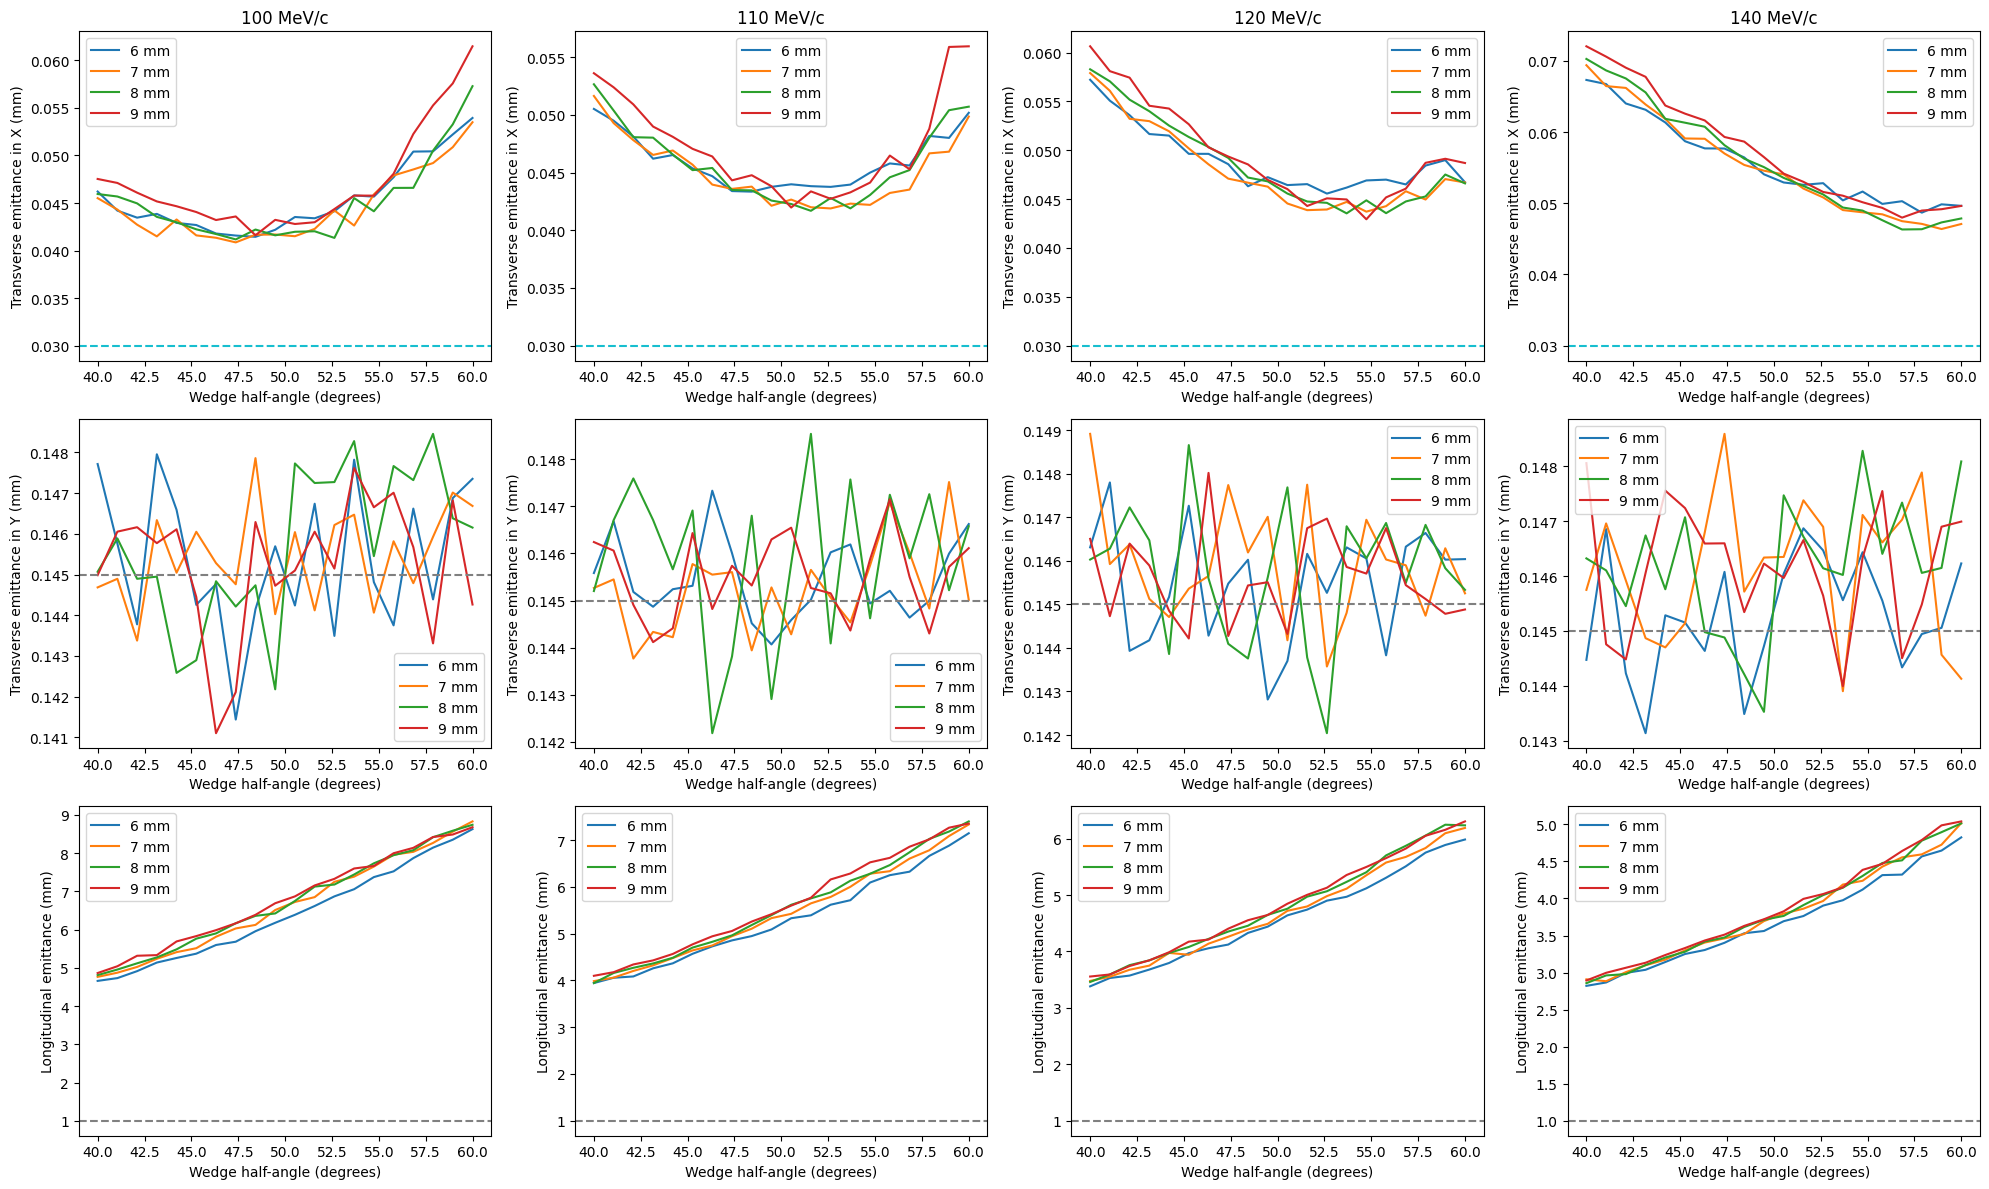

In [125]:
# Graph results
fig, axs = plt.subplots(nrows = 3, ncols = len(momentums))
fig.set_size_inches(20, 12)
for i, momentum in enumerate(momentums):
    for w in lengths:
        subresult = results_post[(results_post["length"] == w) & (results_post["momentum"] == momentum)]
        for j, x in enumerate(["xemit", "yemit", "zemit"]):
            axs[j][i].plot(subresult["angle"], subresult[x], label=f"{w} mm")
            axs[j][i].legend()
    axs[0][i].set_ylabel("Transverse emittance in X (mm)")
    axs[1][i].set_ylabel("Transverse emittance in Y (mm)")
    axs[2][i].set_ylabel("Longitudinal emittance (mm)")
    axs[0][i].set_xlabel("Wedge half-angle (degrees)")
    axs[1][i].set_xlabel("Wedge half-angle (degrees)")
    axs[2][i].set_xlabel("Wedge half-angle (degrees)")
    # axs[0][i].axhline(t_emit, color='gray', linestyle="--")
    axs[0][i].axhline(0.03, color='tab:cyan', linestyle="--")
    axs[1][i].axhline(t_emit, color='gray', linestyle="--")
    axs[2][i].axhline(l_emit, color='gray', linestyle="--")
    axs[0][i].set_title(f"{momentum} MeV/c")
fig.tight_layout()

In [39]:
# Table of minimums

minima = [results_post[results_post["momentum"] == momentum]["xemit"].idxmin() for momentum in momentums]
minima_df = results_post.iloc[minima].set_index("momentum")
minima_df[["angle", "length", "xemit", "yemit", "zemit", "xD"]]

angle  length     xemit     yemit     zemit        xD
momentum                                                           
100       47.368421       7  0.040859  0.144760  6.029077  0.020745
110       51.578947       8  0.041683  0.148537  5.753745  0.023888
120       54.736842       9  0.042936  0.145706  5.497134  0.026780
140       56.842105       8  0.046317  0.147336  4.514931  0.037576

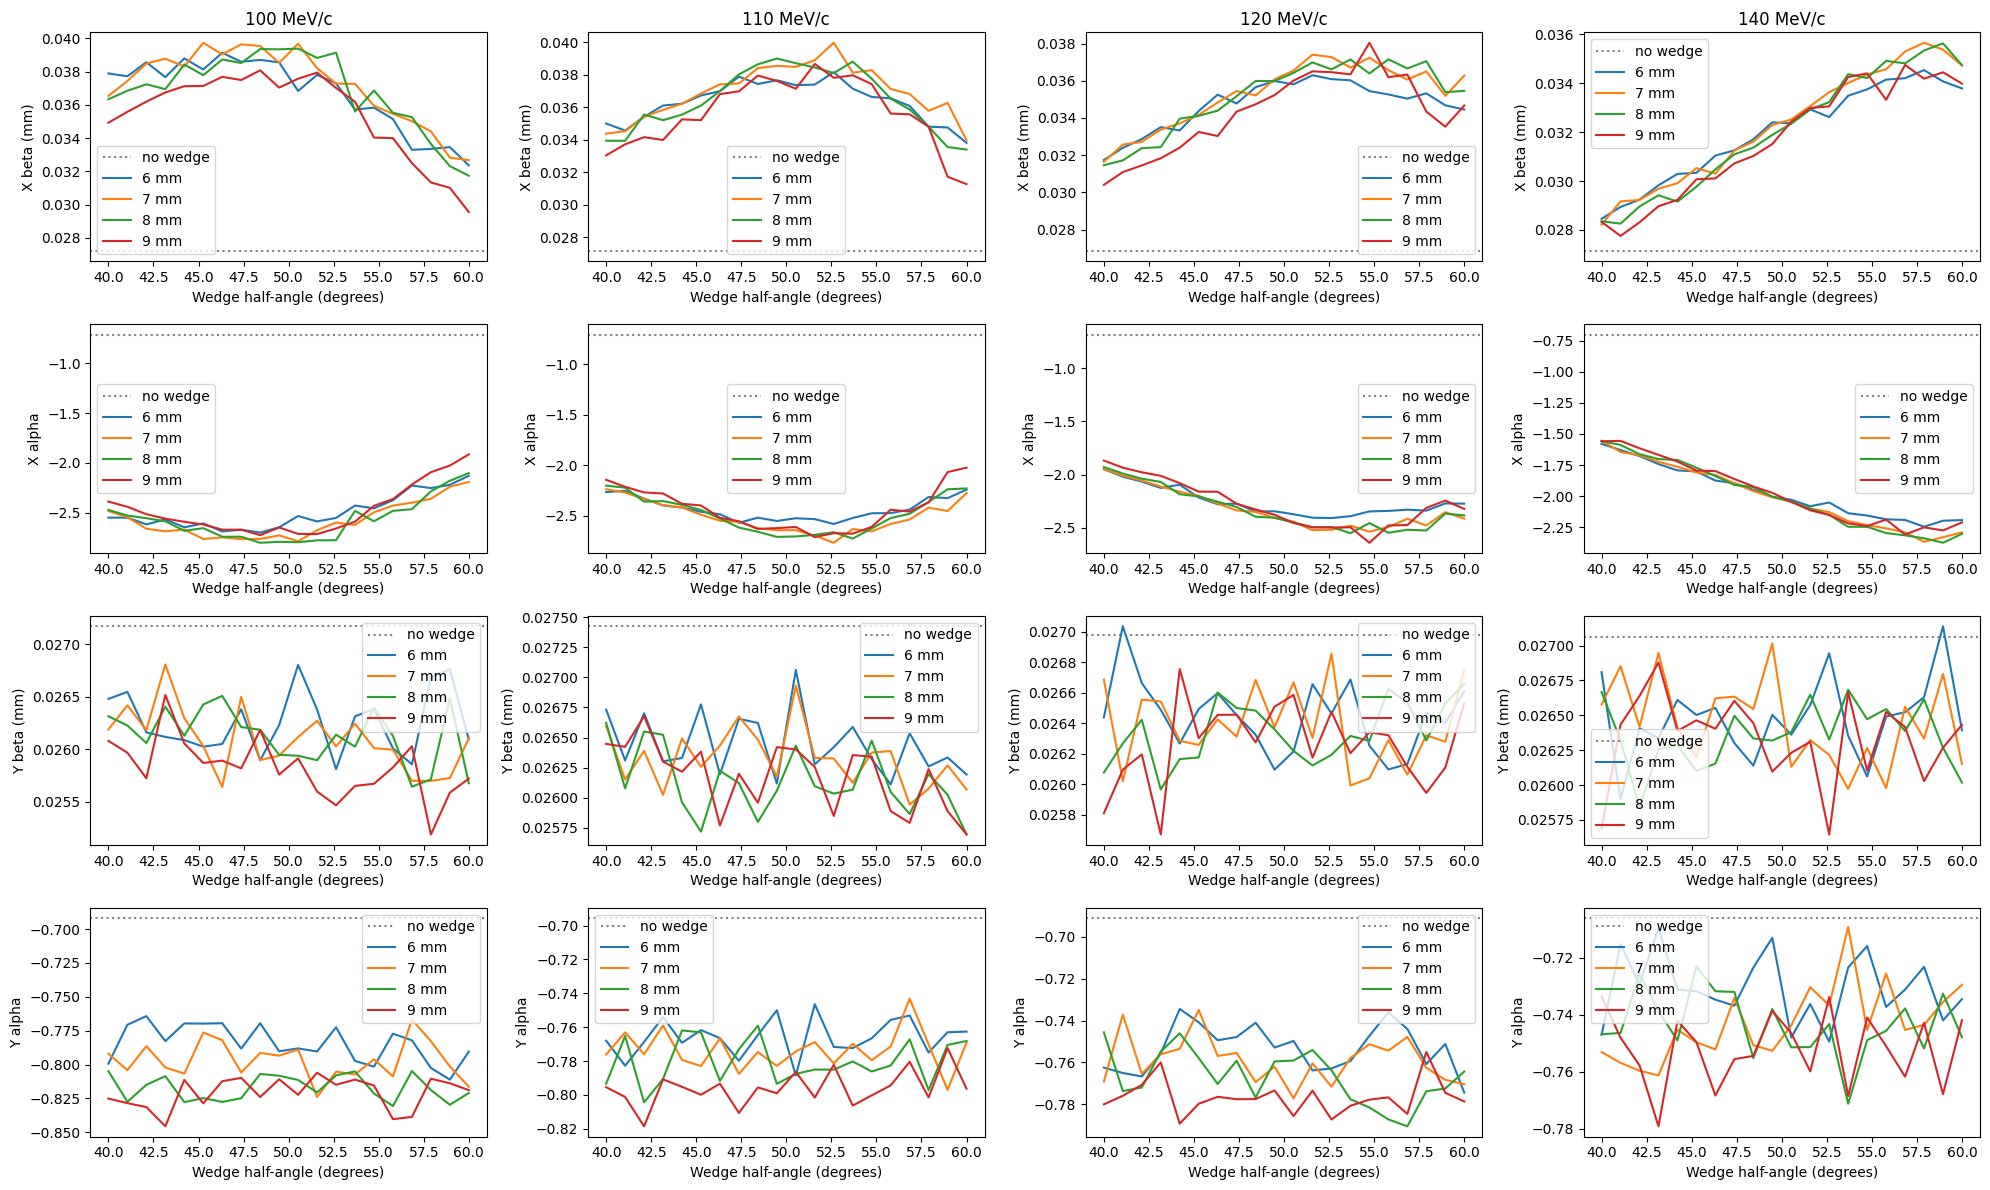

In [27]:
# Graph Twiss parameters
fig, axs = plt.subplots(nrows = 4, ncols = len(momentums))
fig.set_size_inches(20, 12)
for i, momentum in enumerate(momentums):
    for j, x in enumerate(["xbeta", "xalpha", "ybeta", "yalpha"]):
        axs[j][i].axhline(nowedge_post.loc[momentum][x], color="gray", linestyle=":", label="no wedge")
    for w in lengths:
        subresult = results_post[(results_post["length"] == w) & (results_post["momentum"] == momentum)]
        for j, x in enumerate(["xbeta", "xalpha", "ybeta", "yalpha"]):
            axs[j][i].plot(subresult["angle"], subresult[x], label=f"{w} mm")
            axs[j][i].set_xlabel("Wedge half-angle (degrees)")
            axs[j][i].legend()
    axs[0][i].set_ylabel("X beta (mm)")
    axs[1][i].set_ylabel("X alpha")
    axs[2][i].set_ylabel("Y beta (mm)")
    axs[3][i].set_ylabel("Y alpha")
    axs[0][i].set_title(f"{momentum} MeV/c")
fig.tight_layout()

TODO
* Check 110mm emittance case
* Check lower momentum spread case
* Send best distribution
* 

# Effect of momentum spread

In [44]:
# Ranges to scan
angles = np.linspace(40, 60, 20)
lengths = [4.5, 6, 7.5]
p_spreads = [1, 0.8, 0.6]
# Constants
momentum = 100
alpha = 0.7
beta = 0.027
pz_std = 1
t_emit = 0.145
l_emit = 1

In [46]:
# Run simulations
results = list()
trials = list(itertools.product(angles, lengths, p_spreads))
for angle, length, pz_std in tqdm(trials):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, length, angle, 24)
    results.append((angle, length, pz_std, after))
with open("results/angle_scan_psig.pkl", "wb+") as file:
    pickle.dump(results, file)
beep()

100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [6:16:22<00:00, 94.09s/it]


In [47]:
# Run with no wedge as comparison
results = list()
for pz_std in tqdm(p_spreads):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, 7, 45, 24, filename = "G4_FinalCooling_auto_nowedge.g4bl")
    results.append((pz_std, after))
with open("results/psig_nowedge.pkl", "wb+") as file:
    pickle.dump(results, file)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:17<00:00,  5.95s/it]


In [55]:
# Process results
with open("results/angle_scan_psig.pkl", "rb") as file:
    results = pickle.load(file)
results_post = list()
for angle, length, pz_std, after in tqdm(results):
    after = cut_outliers(after, 3.5)
    x_params, y_params, z_emit = calc_all_params(after)
    results_post.append([angle, length, pz_std] + list(x_params) + list(y_params) + [z_emit, len(after)])
results_post = pd.DataFrame(results_post, columns=["angle", "length", "pz_std"] + ["x"+x for x in PARAMS] + ["y"+x for x in PARAMS] + ["zemit", "N"])

# Process no-wedge results
with open("results/psig_nowedge.pkl", "rb") as file:
    results = pickle.load(file)
nowedge_post = list()
for pz_std, after in results:
    after = cut_outliers(after, 3.5)
    x_params, y_params, z_emit = calc_all_params(after)
    nowedge_post.append([pz_std] + list(x_params) + list(y_params) + [z_emit, len(after)])
nowedge_post = pd.DataFrame(nowedge_post, columns=["pz_std"] + ["x"+x for x in PARAMS] + ["y"+x for x in PARAMS] + ["zemit", "N"]).set_index("pz_std")

cut_frac = (12000-np.mean(results_post["N"]))/12000
print(f"Cut fraction: {cut_frac:%}")

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:02<00:00, 89.64it/s]

Cut fraction: 0.540833%


In [56]:
nowedge_post

xemit     xbeta     xgamma    xalpha        xD       xDp     yemit  \
pz_std                                                                          
1.0     0.141935  0.027374  53.892590 -0.689373 -0.001798 -0.164256  0.143889   
0.8     0.141639  0.027055  55.323777 -0.704824  0.001068  0.021151  0.145193   
0.6     0.143675  0.026989  54.165468 -0.679607 -0.000512 -0.066641  0.141164   

           ybeta     ygamma    yalpha        yD       yDp     zemit      N  
pz_std                                                                      
1.0     0.027374  55.878991 -0.727764 -0.001268 -0.011831  1.266316  11939  
0.8     0.027284  55.234238 -0.712052 -0.000512  0.003264  1.392555  11931  
0.6     0.027447  53.770409 -0.689815  0.001209  0.002393  1.583258  11898

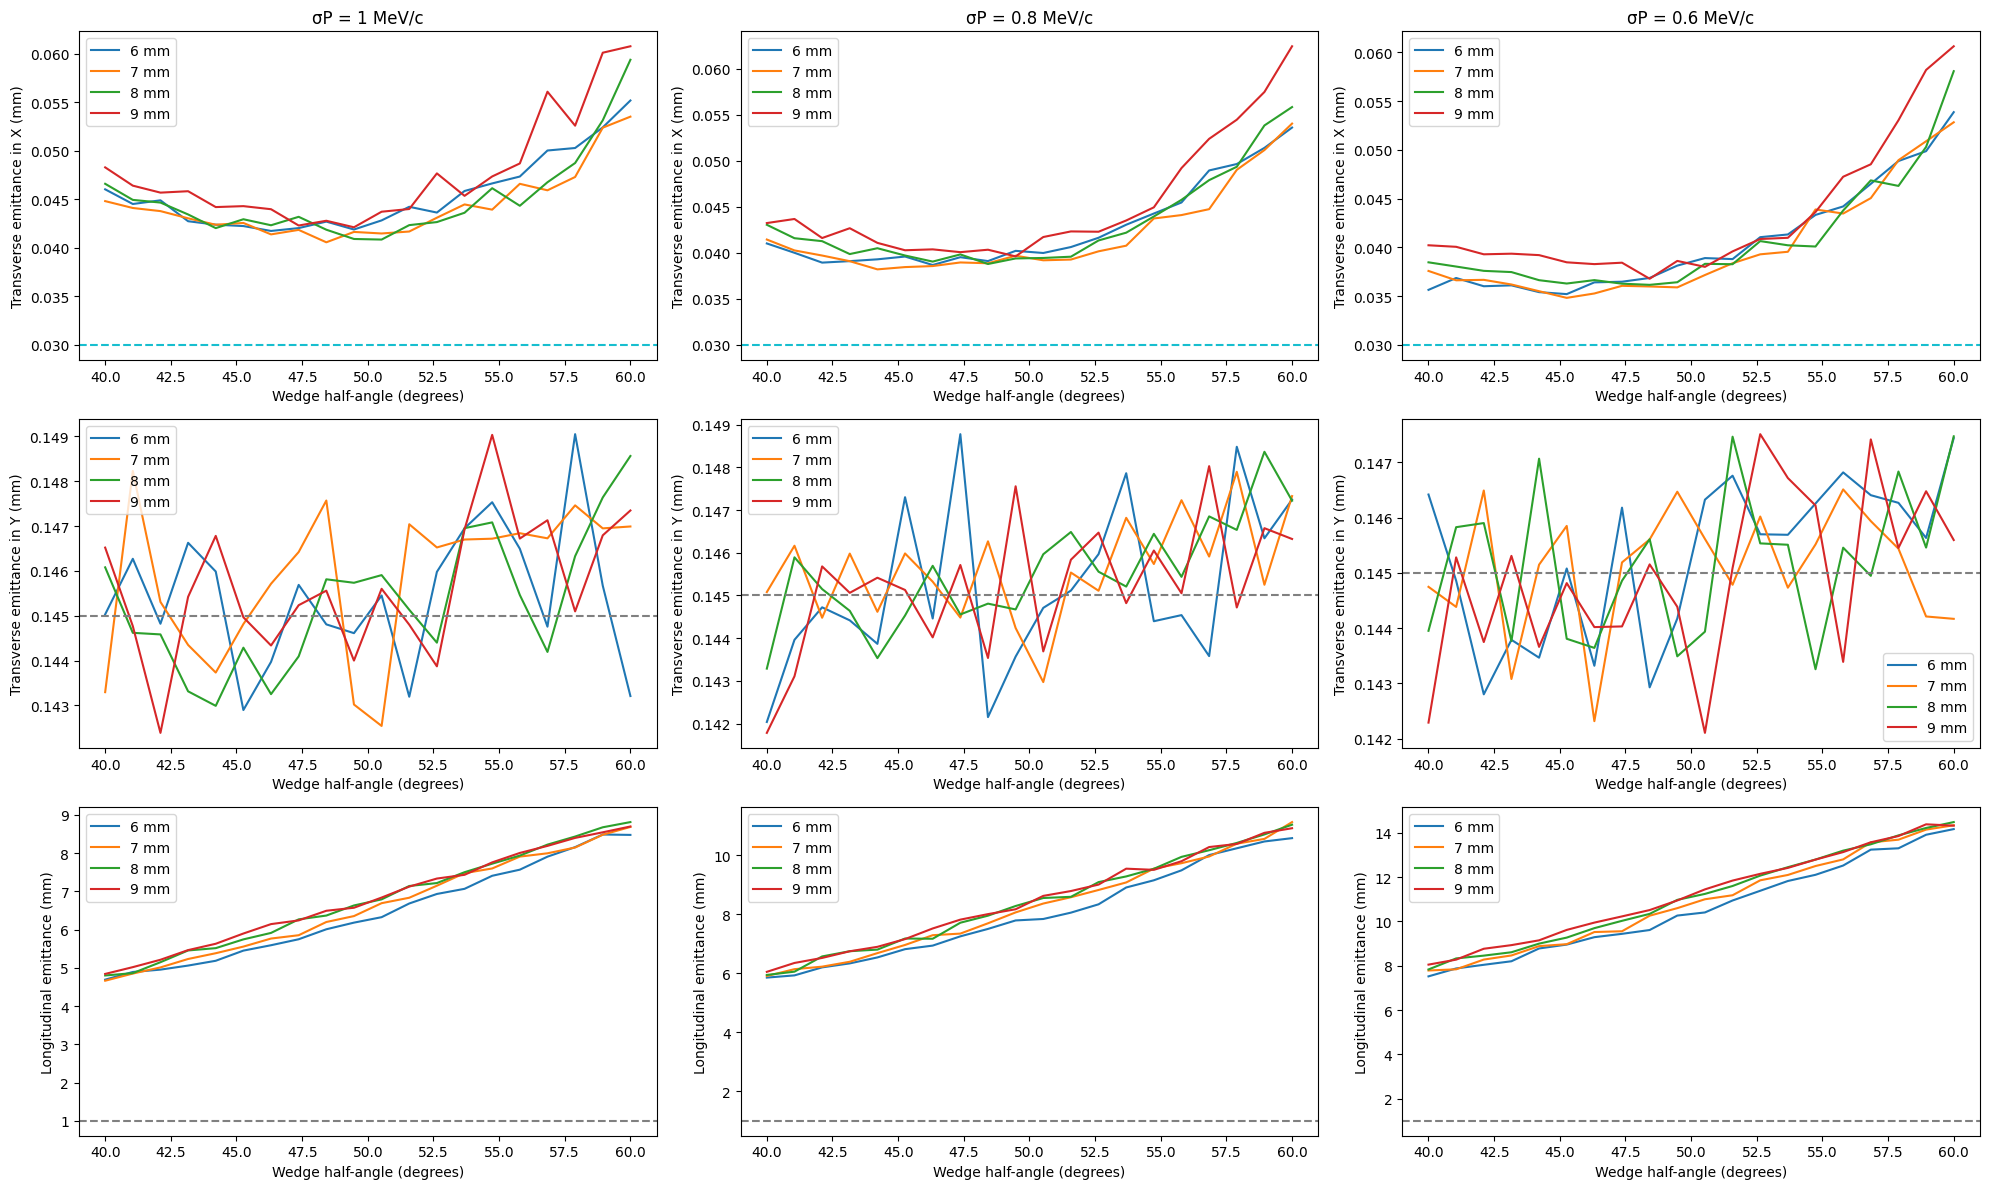

In [57]:
# Graph results
fig, axs = plt.subplots(nrows = 3, ncols = len(p_spreads))
fig.set_size_inches(20, 12)
for i, pz_std in enumerate(p_spreads):
    for w in lengths:
        subresult = results_post[(results_post["length"] == w) & (results_post["pz_std"] == pz_std)]
        for j, x in enumerate(["xemit", "yemit", "zemit"]):
            axs[j][i].plot(subresult["angle"], subresult[x], label=f"{w} mm")
            axs[j][i].legend()
    axs[0][i].set_ylabel("Transverse emittance in X (mm)")
    axs[1][i].set_ylabel("Transverse emittance in Y (mm)")
    axs[2][i].set_ylabel("Longitudinal emittance (mm)")
    axs[0][i].set_xlabel("Wedge half-angle (degrees)")
    axs[1][i].set_xlabel("Wedge half-angle (degrees)")
    axs[2][i].set_xlabel("Wedge half-angle (degrees)")
    # axs[0][i].axhline(t_emit, color='gray', linestyle="--")
    axs[0][i].axhline(0.03, color='tab:cyan', linestyle="--")
    axs[1][i].axhline(t_emit, color='gray', linestyle="--")
    axs[2][i].axhline(l_emit, color='gray', linestyle="--")
    axs[0][i].set_title(f"σP = {pz_std} MeV/c")
fig.tight_layout()

In [61]:
# Table of minimums

minima = [results_post[results_post["pz_std"] == pz_std]["xemit"].idxmin() for pz_std in p_spreads]
minima_df = results_post.iloc[minima].set_index("pz_std")
minima_df[["angle", "length", "xemit", "yemit", "zemit", "xD"]]

angle  length     xemit     yemit     zemit        xD
pz_std                                                           
1.0     48.421053       7  0.040574  0.147569  6.198897  0.020168
0.8     44.210526       7  0.038207  0.144617  6.677951  0.023256
0.6     45.263158       7  0.034833  0.145849  8.973794  0.023067

# Effect of transverse emittance

In [84]:
# Ranges to scan
angles = np.linspace(40, 60, 20)
lengths = [4.5, 6, 7.5]
t_emits = [0.145, 0.110, 0.090]
# Constants
momentum = 100
alpha = 0.7
beta = 0.030
pz_std = 1
l_emit = 1

In [85]:
# Run simulations
results = list()
trials = list(itertools.product(angles, lengths, t_emits))
for angle, length, t_emit in tqdm(trials):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, length, angle, 24)
    results.append((angle, length, t_emit, after))
with open("results/angle_scan_temit.pkl", "wb+") as file:
    pickle.dump(results, file)
beep()

100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [20:06<00:00,  6.70s/it]


In [86]:
# Run with no wedge as comparison
results = list()
for t_emit in tqdm(t_emits):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, 7, 45, 24, filename = "G4_FinalCooling_auto_nowedge.g4bl")
    results.append((t_emit, after))
with open("results/temit_nowedge.pkl", "wb+") as file:
    pickle.dump(results, file)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  5.00s/it]


In [87]:
# Process results
with open("results/angle_scan_temit.pkl", "rb") as file:
    results = pickle.load(file)
results_post = list()
for angle, length, t_emit, after in tqdm(results):
    after = cut_outliers(after, 3.5)
    x_params, y_params, z_emit = calc_all_params(after)
    results_post.append([angle, length, t_emit] + list(x_params) + list(y_params) + [z_emit, len(after)])
results_post = pd.DataFrame(results_post, columns=["angle", "length", "t_emit"] + ["x"+x for x in PARAMS] + ["y"+x for x in PARAMS] + ["zemit", "N"])

# Process no-wedge results
with open("results/temit_nowedge.pkl", "rb") as file:
    results = pickle.load(file)
nowedge_post = list()
for t_emit, after in results:
    after = cut_outliers(after, 3.5)
    x_params, y_params, z_emit = calc_all_params(after)
    nowedge_post.append([t_emit] + list(x_params) + list(y_params) + [z_emit, len(after)])
nowedge_post = pd.DataFrame(nowedge_post, columns=["t_emit"] + ["x"+x for x in PARAMS] + ["y"+x for x in PARAMS] + ["zemit", "N"]).set_index("t_emit")

cut_frac = (12000-np.mean(results_post["N"]))/12000
print(f"Cut fraction: {cut_frac:%}")

100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [00:01<00:00, 90.84it/s]


Cut fraction: 0.656667%


In [88]:
nowedge_post

xemit     xbeta     xgamma    xalpha        xD       xDp     yemit  \
t_emit                                                                          
0.145   0.143907  0.026806  49.522018 -0.572251  0.000164  0.081664  0.146198   
0.110   0.110137  0.026679  48.533753 -0.542992 -0.001091  0.053699  0.108670   
0.090   0.089768  0.026277  49.174391 -0.540492  0.001415  0.060366  0.089265   

           ybeta     ygamma    yalpha        yD       yDp     zemit      N  
t_emit                                                                      
0.145   0.026438  49.569862 -0.557254  0.003957  0.158811  1.234650  11962  
0.110   0.026576  48.880575 -0.546852 -0.000322 -0.001764  1.114979  11947  
0.090   0.026062  49.773755 -0.545186  0.000504 -0.017988  1.101765  11963

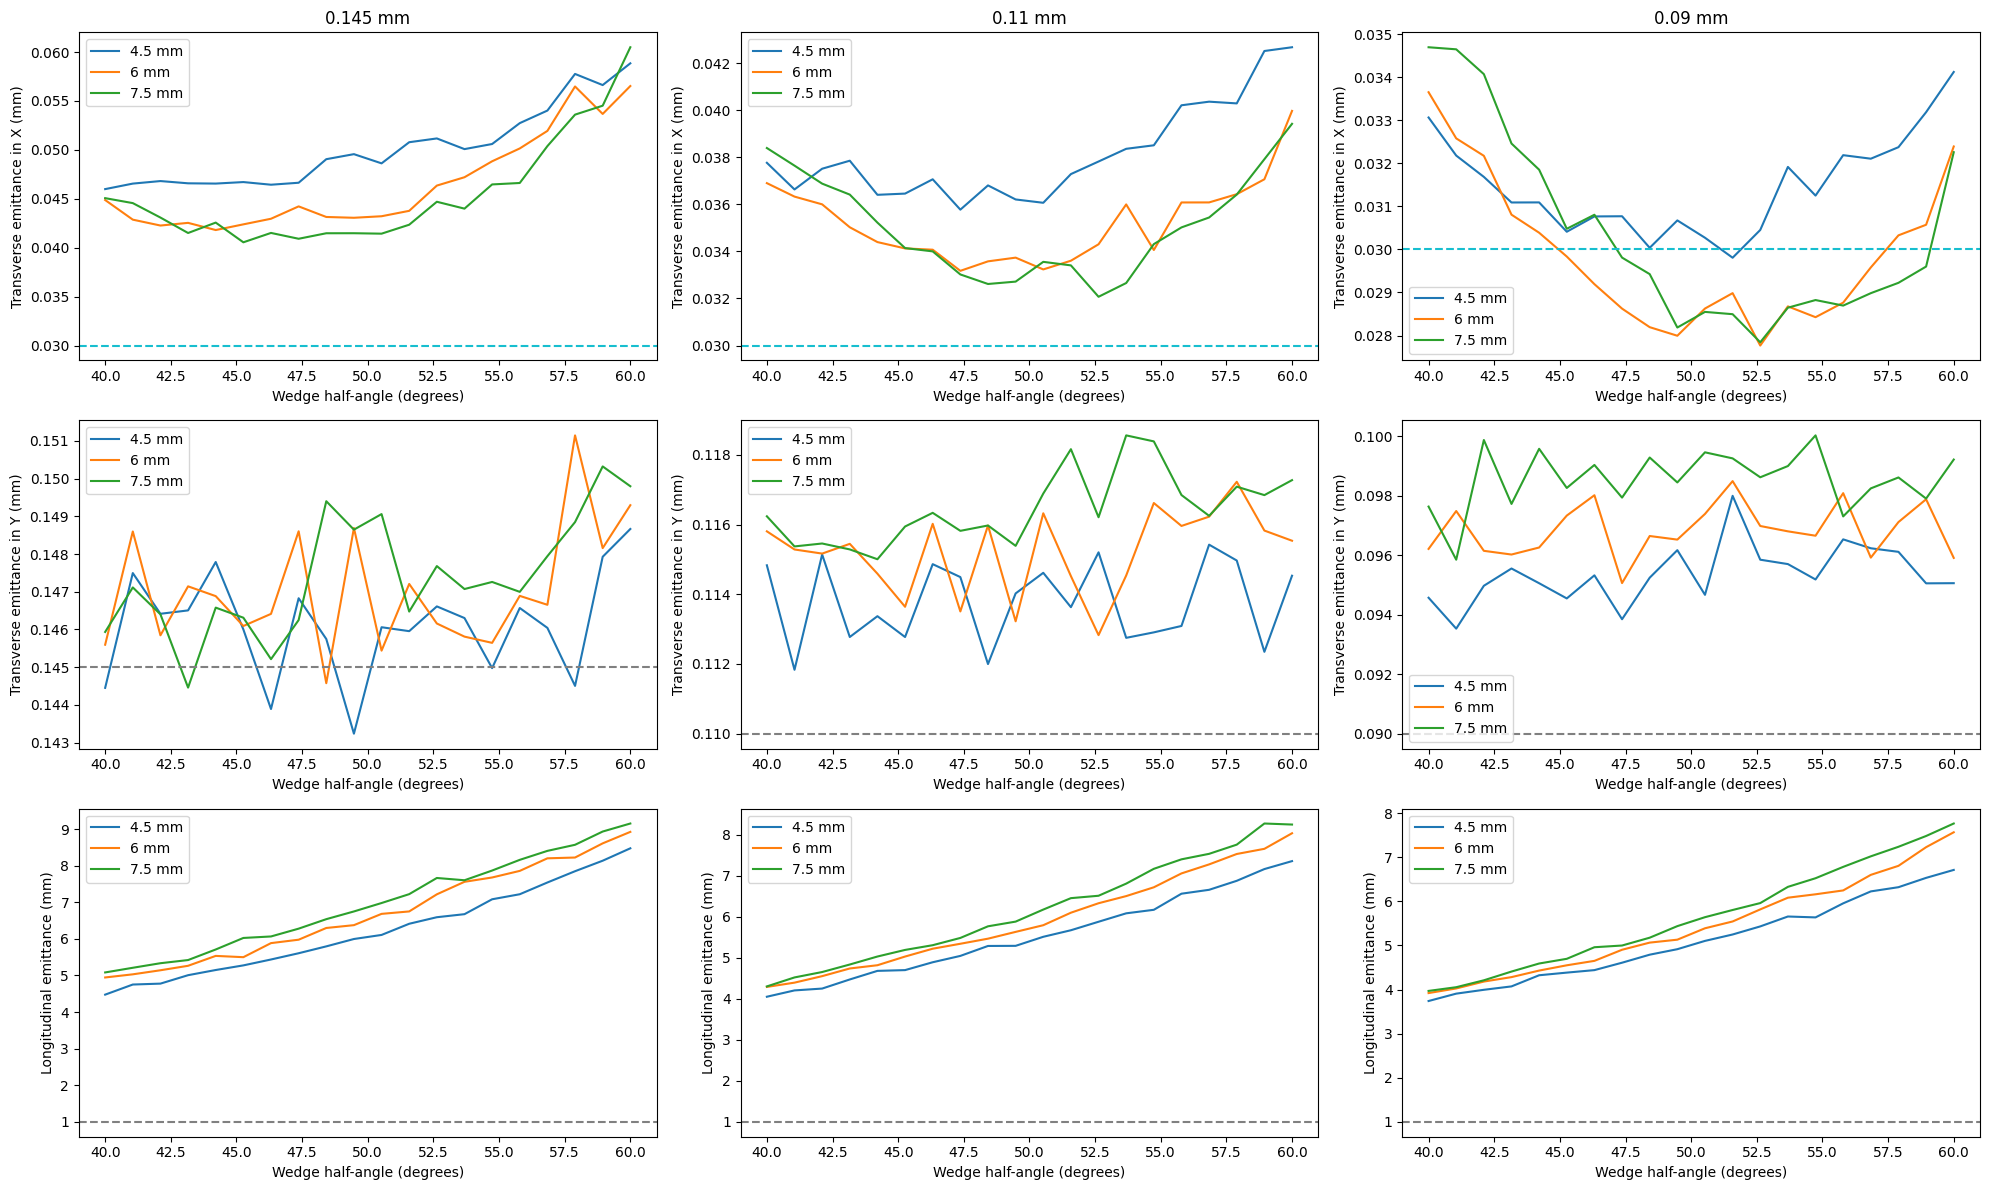

In [89]:
# Graph results
fig, axs = plt.subplots(nrows = 3, ncols = len(t_emits))
fig.set_size_inches(20, 12)
for i, t_emit in enumerate(t_emits):
    for w in lengths:
        subresult = results_post[(results_post["length"] == w) & (results_post["t_emit"] == t_emit)]
        for j, x in enumerate(["xemit", "yemit", "zemit"]):
            axs[j][i].plot(subresult["angle"], subresult[x], label=f"{w} mm")
            axs[j][i].legend()
    axs[0][i].set_ylabel("Transverse emittance in X (mm)")
    axs[1][i].set_ylabel("Transverse emittance in Y (mm)")
    axs[2][i].set_ylabel("Longitudinal emittance (mm)")
    axs[0][i].set_xlabel("Wedge half-angle (degrees)")
    axs[1][i].set_xlabel("Wedge half-angle (degrees)")
    axs[2][i].set_xlabel("Wedge half-angle (degrees)")
    # axs[0][i].axhline(t_emit, color='gray', linestyle="--")
    axs[0][i].axhline(0.03, color='tab:cyan', linestyle="--")
    axs[1][i].axhline(t_emit, color='gray', linestyle="--")
    axs[2][i].axhline(l_emit, color='gray', linestyle="--")
    axs[0][i].set_title(f"{t_emit} mm")
fig.tight_layout()

In [83]:
# Table of minimums

minima = [results_post[results_post["t_emit"] == t_emit]["xemit"].idxmin() for t_emit in t_emits]
minima_df = results_post.iloc[minima].set_index("t_emit")
minima_df[["angle", "length", "xemit", "yemit", "zemit", "xD"]]

angle  length     xemit     yemit     zemit        xD
t_emit                                                           
0.145   46.315789     7.5  0.040874  0.143834  5.752770  0.020892
0.110   52.631579     6.0  0.032890  0.111757  5.944020  0.018354
0.090   54.736842     6.0  0.027844  0.096102  5.855889  0.017061

# 110 micron case

These runs use only length 7 cm as I've shown it's fairly optimal

## Momentum spread

In [2]:
# Ranges to scan
angles = np.linspace(40, 60, 20)
p_spreads = [1, 0.9, 0.8, 0.7, 0.6]
# Constants
momentum = 100
length = 7
alpha = 0.7
beta = 0.03
pz_std = 1
t_emit = 0.110
l_emit = 1

In [4]:
print_all_params(gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit))

-----------------------------
Twiss parameters for X
emit  = 0.10926433354071648 mm
beta  = 0.029708352912089706 m
gamma = 49.89824171733178 1/m
alpha = 0.6945463084857983
D     = 0.0006099180665773627 m
D'    = 0.02208737587431053

Twiss parameters for Y
emit  = 0.1087685628490645 mm
beta  = 0.029899949779089628 m
gamma = 49.77943151179932 1/m
alpha = 0.6988579986194845
D     = -0.0009155598340557571 m
D'    = 0.043166588995793

Z-emittance:  1.1463582991367434 mm
Z std: 152.65121627310407 mm
pZ std: 1.1543612571362807 MeV/c
Mean momentum: 100.00388872547714 MeV/c
-----------------------------


In [17]:
# Run simulations
results = list()
trials = list(itertools.product(angles, p_spreads))
for angle, pz_std in tqdm(trials):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, length, angle, 24)
    results.append((angle, pz_std, after))
with open("results/angle_scan_psig_2.pkl", "wb+") as file:
    pickle.dump(results, file)
beep()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [11:06<00:00,  6.67s/it]


In [18]:
# Run with no wedge as comparison
results = list()
for pz_std in tqdm(p_spreads):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, 7, 45, 24, filename = "G4_FinalCooling_auto_nowedge.g4bl")
    results.append((pz_std, after))
with open("results/psig_nowedge.pkl", "wb+") as file:
    pickle.dump(results, file)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.08s/it]


In [19]:
# Process results
with open("results/angle_scan_psig_2.pkl", "rb") as file:
    results = pickle.load(file)
results_post = list()
for angle, pz_std, after in tqdm(results):
    after = cut_outliers(after, 3.5)
    x_params, y_params, z_emit = calc_all_params(after)
    results_post.append([angle, pz_std] + list(x_params) + list(y_params) + [z_emit, len(after)])
results_post = pd.DataFrame(results_post, columns=["angle", "pz_std"] + ["x"+x for x in PARAMS] + ["y"+x for x in PARAMS] + ["zemit", "N"])

# Process no-wedge results
with open("results/psig_nowedge.pkl", "rb") as file:
    results = pickle.load(file)
nowedge_post = list()
for pz_std, after in results:
    after = cut_outliers(after, 3.5)
    x_params, y_params, z_emit = calc_all_params(after)
    nowedge_post.append([pz_std] + list(x_params) + list(y_params) + [z_emit, len(after)])
nowedge_post = pd.DataFrame(nowedge_post, columns=["pz_std"] + ["x"+x for x in PARAMS] + ["y"+x for x in PARAMS] + ["zemit", "N"]).set_index("pz_std")

cut_frac = (12000-np.mean(results_post["N"]))/12000
print(f"Cut fraction: {cut_frac:%}")

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 91.63it/s]

Cut fraction: 0.631833%


In [20]:
nowedge_post

xemit     xbeta     xgamma    xalpha        xD       xDp     yemit  \
pz_std                                                                          
1.0     0.108809  0.026206  49.732546 -0.550734  0.000550 -0.030215  0.108408   
0.9     0.109347  0.026377  49.674290 -0.557023 -0.001889 -0.103981  0.107222   
0.8     0.109521  0.026447  49.278167 -0.550710  0.000918  0.089118  0.110166   
0.7     0.111394  0.026616  48.558906 -0.540801  0.000325 -0.069106  0.108416   
0.6     0.108851  0.026692  49.579736 -0.568676 -0.003339  0.164338  0.106882   

           ybeta     ygamma    yalpha        yD       yDp     zemit      N  
pz_std                                                                      
1.0     0.026216  50.686641 -0.573391 -0.000134  0.021205  1.125911  11967  
0.9     0.026092  50.456497 -0.562610  0.002451  0.053075  1.170982  11959  
0.8     0.026299  49.552603 -0.550603 -0.001012 -0.109714  1.186311  11950  
0.7     0.026389  48.740203 -0.534982  0.000791 -0.056139  1.269493  11948  
0.6     0.025838  49.826207 -0.536121  0.001755 -0.165392  1.324224  11940

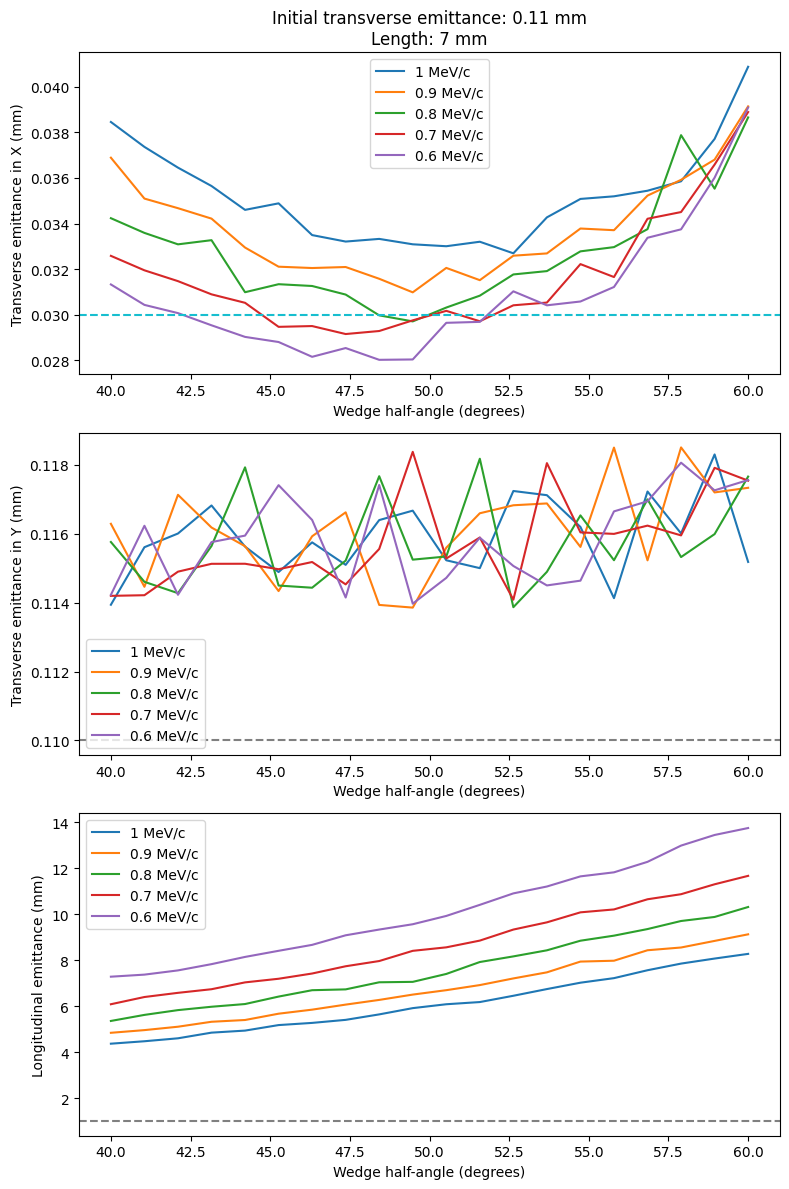

In [21]:
# Graph results
fig, axs = plt.subplots(nrows = 3)
fig.set_size_inches(8, 12)
for pz_std in p_spreads:
    subresult = results_post[results_post["pz_std"] == pz_std]
    for j, x in enumerate(["xemit", "yemit", "zemit"]):
        axs[j].plot(subresult["angle"], subresult[x], label=f"{pz_std} MeV/c")
        axs[j].legend()
axs[0].set_ylabel("Transverse emittance in X (mm)")
axs[1].set_ylabel("Transverse emittance in Y (mm)")
axs[2].set_ylabel("Longitudinal emittance (mm)")
axs[0].set_xlabel("Wedge half-angle (degrees)")
axs[1].set_xlabel("Wedge half-angle (degrees)")
axs[2].set_xlabel("Wedge half-angle (degrees)")
# axs[0][i].axhline(t_emit, color='gray', linestyle="--")
axs[0].axhline(0.03, color='tab:cyan', linestyle="--")
axs[1].axhline(t_emit, color='gray', linestyle="--")
axs[2].axhline(l_emit, color='gray', linestyle="--")
axs[0].set_title(f"Initial transverse emittance: {t_emit} mm\nLength: {length} mm")
fig.tight_layout()

In [25]:
# Table of minimums

minima = [results_post[results_post["pz_std"] == pz_std]["xemit"].idxmin() for pz_std in p_spreads]
minima_df = results_post.iloc[minima].set_index("pz_std")
minima_df[["angle", "xemit", "yemit", "zemit", "xD", "xDp"]].loc[0.8]

angle    49.473684
xemit     0.029708
yemit     0.115247
zemit     7.057445
xD        0.019211
xDp      -0.042152
Name: 0.8, dtype: float64

## Beta

Fixed momentum spread at 1.0 MeV/c, scanning beta

In [28]:
# Ranges to scan
angles = np.linspace(40, 60, 20)
betas = [0.021, 0.024, 0.027, 0.03, 0.033]
# Constants
momentum = 100
length = 7
alpha = 0.7
beta = 0.03
pz_std = 1
t_emit = 0.110
l_emit = 1

In [29]:
# Run simulations
results = list()
trials = list(itertools.product(angles, betas))
for angle, beta in tqdm(trials):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, length, angle, 24)
    results.append((angle, beta, after))
with open("results/angle_scan_110_beta.pkl", "wb+") as file:
    pickle.dump(results, file)
beep()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [11:06<00:00,  6.66s/it]


In [30]:
# Run with no wedge as comparison
results = list()
for beta in tqdm(betas):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, 7, 45, 24, filename = "G4_FinalCooling_auto_nowedge.g4bl")
    results.append((beta, after))
with open("results/beta_nowedge_110.pkl", "wb+") as file:
    pickle.dump(results, file)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.09s/it]


In [31]:
X_NAME = "beta"  # change this when the variable you're changing varies

# Process results
with open("results/angle_scan_110_beta.pkl", "rb") as file:
    results = pickle.load(file)
results_post = list()
for angle, x, after in tqdm(results):
    after = cut_outliers(after, 3.5)
    x_params, y_params, z_emit = calc_all_params(after)
    results_post.append([angle, x] + list(x_params) + list(y_params) + [z_emit, len(after)])
results_post = pd.DataFrame(results_post, columns=["angle", X_NAME] + ["x"+x for x in PARAMS] + ["y"+x for x in PARAMS] + ["zemit", "N"])

# Process no-wedge results
with open("results/beta_nowedge_110.pkl", "rb") as file:
    results = pickle.load(file)
nowedge_post = list()
for pz_std, after in results:
    after = cut_outliers(after, 3.5)
    x_params, y_params, z_emit = calc_all_params(after)
    nowedge_post.append([pz_std] + list(x_params) + list(y_params) + [z_emit, len(after)])
nowedge_post = pd.DataFrame(nowedge_post, columns=[X_NAME] + ["x"+x for x in PARAMS] + ["y"+x for x in PARAMS] + ["zemit", "N"]).set_index(X_NAME)

cut_frac = (12000-np.mean(results_post["N"]))/12000
print(f"Cut fraction: {cut_frac:%}")

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 91.90it/s]


Cut fraction: 0.645083%


In [32]:
nowedge_post

xemit     xbeta     xgamma    xalpha        xD       xDp     yemit  \
beta                                                                           
0.021  0.107544  0.031373  70.359609 -1.098816  0.000756 -0.011631  0.108418   
0.024  0.110238  0.028325  61.593511 -0.862922 -0.001821 -0.070212  0.108458   
0.027  0.107772  0.026636  54.632710 -0.674696  0.002415 -0.047893  0.108555   
0.030  0.110299  0.026646  48.750388 -0.546814 -0.001715  0.024804  0.108109   
0.033  0.109302  0.026155  45.539219 -0.437121 -0.002142 -0.018094  0.109251   

          ybeta     ygamma    yalpha        yD       yDp     zemit      N  
beta                                                                       
0.021  0.030954  70.691501 -1.090028 -0.001193  0.042980  1.248894  11940  
0.024  0.028283  62.374762 -0.874156 -0.000389 -0.057759  1.224514  11950  
0.027  0.026761  54.939423 -0.685726  0.001417  0.047567  1.151253  11954  
0.030  0.026118  49.484276 -0.540761 -0.001156 -0.046425  1.153084  11959  
0.033  0.026247  44.954977 -0.424198  0.001366  0.026877  1.111605  11959

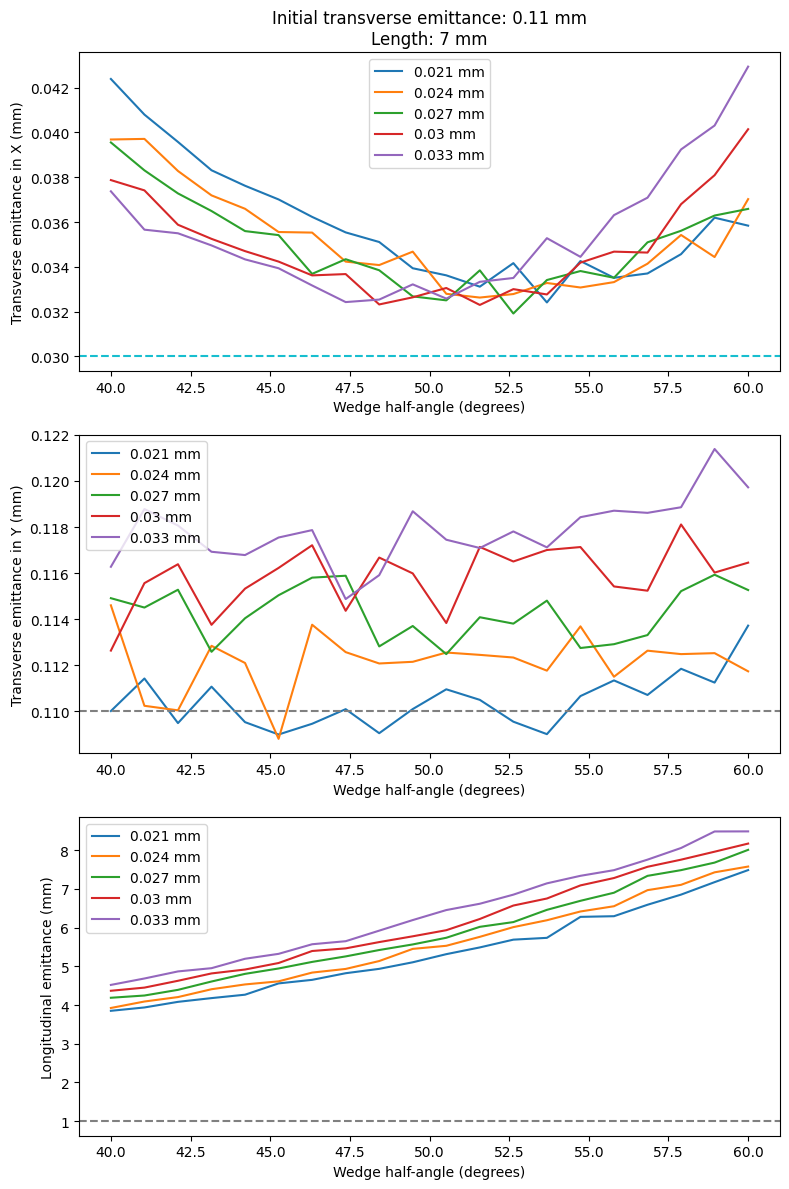

In [34]:
# Graph results
fig, axs = plt.subplots(nrows = 3)
fig.set_size_inches(8, 12)
for beta in betas:
    subresult = results_post[results_post["beta"] == beta]
    for j, x in enumerate(["xemit", "yemit", "zemit"]):
        axs[j].plot(subresult["angle"], subresult[x], label=f"{beta} mm")
        axs[j].legend()
axs[0].set_ylabel("Transverse emittance in X (mm)")
axs[1].set_ylabel("Transverse emittance in Y (mm)")
axs[2].set_ylabel("Longitudinal emittance (mm)")
axs[0].set_xlabel("Wedge half-angle (degrees)")
axs[1].set_xlabel("Wedge half-angle (degrees)")
axs[2].set_xlabel("Wedge half-angle (degrees)")
# axs[0][i].axhline(t_emit, color='gray', linestyle="--")
axs[0].axhline(0.03, color='tab:cyan', linestyle="--")
axs[1].axhline(t_emit, color='gray', linestyle="--")
axs[2].axhline(l_emit, color='gray', linestyle="--")
axs[0].set_title(f"Initial transverse emittance: {t_emit} mm\nLength: {length} mm")
fig.tight_layout()

In [36]:
# Table of minimums

minima = [results_post[results_post["beta"] == beta]["xemit"].idxmin() for beta in betas]
minima_df = results_post.iloc[minima].set_index("beta")
minima_df[["angle", "xemit", "yemit", "zemit", "xD", "xDp"]]

angle     xemit     yemit     zemit        xD       xDp
beta                                                              
0.021  53.684211  0.032411  0.109017  5.733790  0.019177  0.210919
0.024  51.578947  0.032630  0.112455  5.759895  0.019108  0.103334
0.027  52.631579  0.031918  0.113809  6.140922  0.017185 -0.004153
0.030  51.578947  0.032300  0.117136  6.220864  0.017511 -0.049374
0.033  47.368421  0.032428  0.114875  5.647103  0.019921 -0.087158

# Effect of VD location

A VD that's too close will cause problems, use this to verify that it's far enough away

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 95.53it/s]


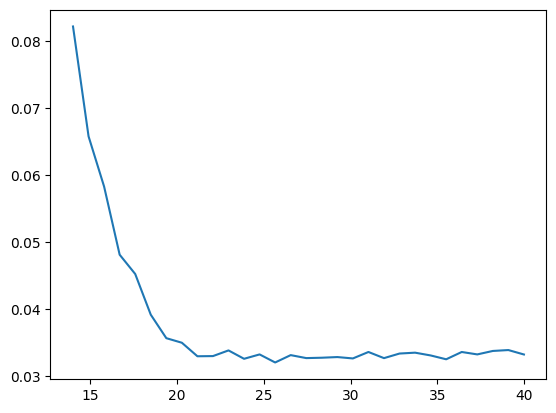

In [25]:
# Values to scan
vd_dists = np.linspace(14, 40, 30)
# Constants
angle = 52.63
length = 7
t_emit = 0.110
momentum = 100
alpha = 0.7
beta = 0.027
pz_std = 1
l_emit = 1

results = list()
for vd_dist in tqdm(vd_dists):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, length, angle, vd_dist)
    results.append((vd_dist, after))
# I'm not going to dignify this test by saving it

results_post = list()
for vd_dist, after in tqdm(results):
    after = cut_outliers(after, 3.5)
    x_params, y_params, z_emit = calc_all_params(after)
    results_post.append([vd_dist] + list(x_params) + list(y_params) + [z_emit, len(after)])
results_post = pd.DataFrame(results_post, columns=["vd_dist"] + ["x"+x for x in PARAMS] + ["y"+x for x in PARAMS] + ["zemit", "N"])

plt.plot(results_post["vd_dist"], results_post["xemit"])
beep()

# Example case

## 110 μm

In [93]:
# Values to use
angle = 52.63
length = 7
t_emit = 0.110
momentum = 100
alpha = 0.7
beta = 0.027
pz_std = 1
l_emit = 1
vd_dist = 24

# Run simulation
before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
after = run_distribution(before, length, angle, 24)
no_wedge = run_distribution(before, length, angle, 24, filename = "G4_FinalCooling_auto_nowedge.g4bl")
corrected = remove_dispersion(after)

In [94]:
# Define names
PLOT_TARGETS = [before, no_wedge, after, corrected]
PLOT_TITLES = ["Before", "Control", "After", "Corrected"]

# Save
RUN_NAME = "110"
SAVE_PATH = "results/distributions/"
for target, title in zip(PLOT_TARGETS, PLOT_TITLES):
    write_trackfile(target, SAVE_PATH + RUN_NAME + "_" + title + ".txt", RUN_NAME + "_" + title)

Text(0.5, 0.98, '110 μm')

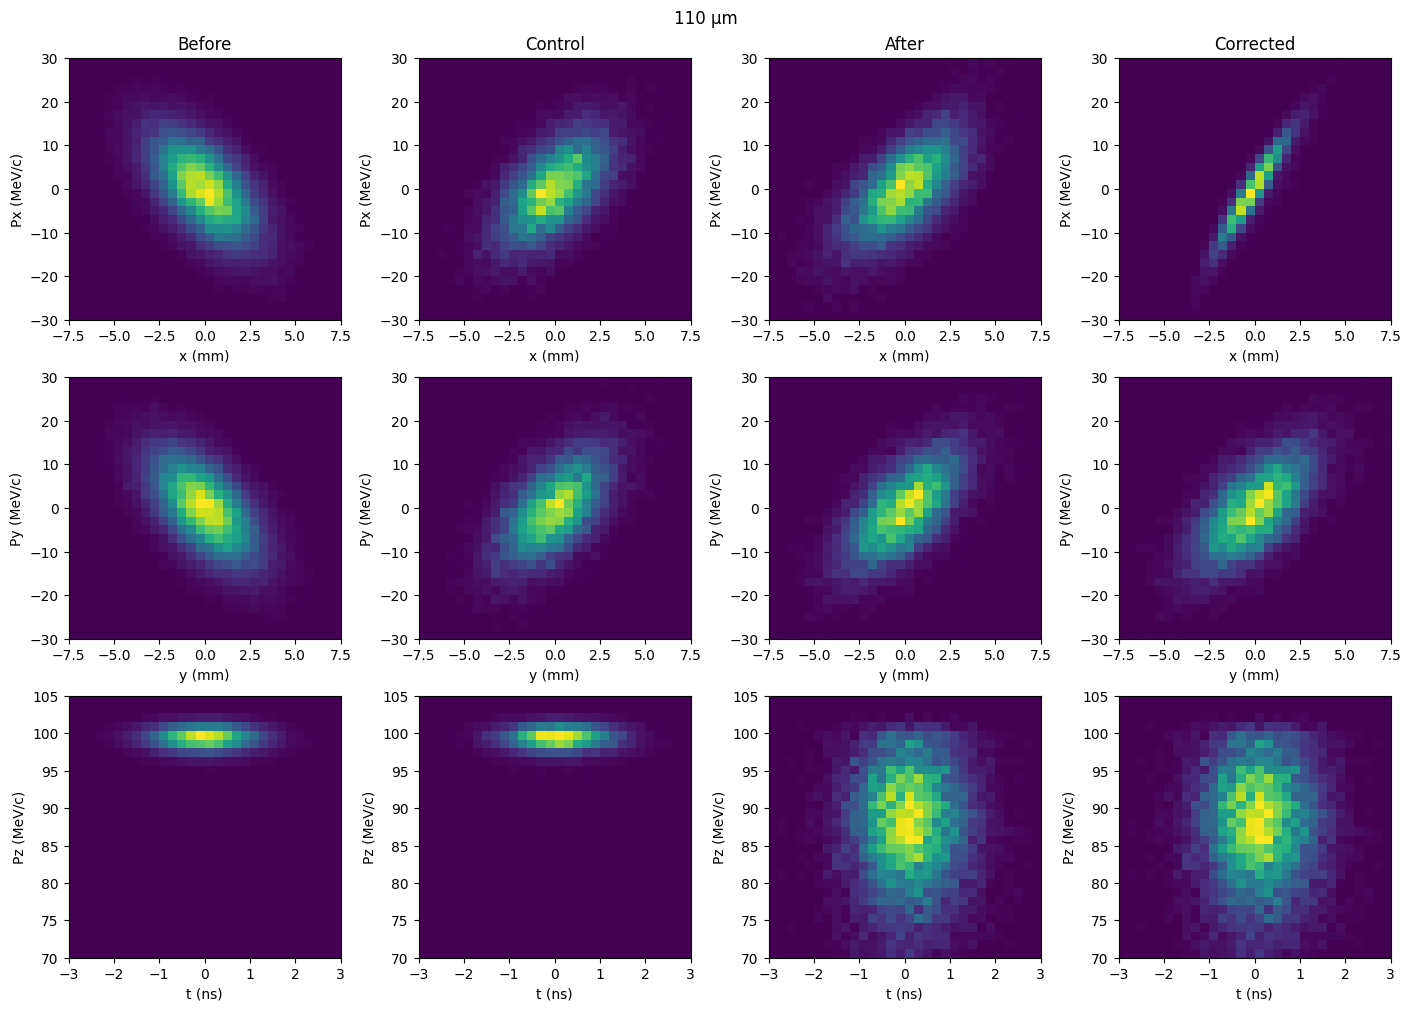

In [95]:
# Make some phase space plots
PLOT_AXES = [("x", "Px"), ("y", "Py"), ("t", "Pz")]
PLOT_LABELS = [("x (mm)", "Px (MeV/c)"), ("y (mm)", "Py (MeV/c)"), ("t (ns)", "Pz (MeV/c)")]
PLOT_RANGES = [
    [[-7.5, 7.5], [-30, 30]],
    [[-7.5, 7.5], [-30, 30]],
    [[-3, 3], [70, 105]]
]
fig, axes = plt.subplots(nrows = len(PLOT_AXES), ncols = len(PLOT_TARGETS), layout="constrained")
fig.set_size_inches(14, 10)
for i, df in enumerate(PLOT_TARGETS):
    axes[0][i].set_title(PLOT_TITLES[i])
    for j, ((xaxis, yaxis), (xlabel, ylabel), ranges) in enumerate(zip(PLOT_AXES, PLOT_LABELS, PLOT_RANGES)):
        ax = axes[j][i]
        ax.hist2d(df[xaxis], df[yaxis], bins=30, range=ranges)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
fig.suptitle(f"{t_emit*1000:.0f} μm")

In [96]:
for x in PLOT_TARGETS:
    df_calc(x)

Text(0.5, 0.98, '110 μm')

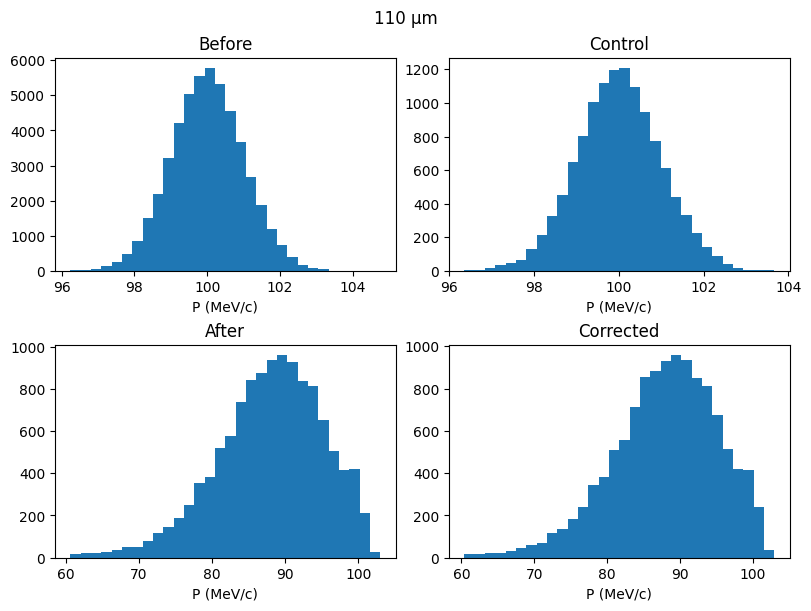

In [97]:
fig, axes = plt.subplots(nrows=2, ncols=2, layout="constrained")
fig.set_size_inches(8, 6)
axes = axes.flatten()
for ax, df, title in zip(axes, PLOT_TARGETS, PLOT_TITLES):
    ax.hist(df["P"], bins=30)
    ax.set_title(title)
    ax.set_xlabel("P (MeV/c)")
fig.suptitle(f"{t_emit*1000:.0f} μm")

In [98]:
print_all_params(cut_outliers(corrected))

-----------------------------
Twiss parameters for X
emit  = 0.03476079553472704 mm
beta  = 0.03760730702066783 m
gamma = 222.25505451243407 1/m
alpha = -2.7126396870842195
D     = -2.537219618374806e-05 m
D'    = -0.0029035728387337453

Twiss parameters for Y
emit  = 0.11646217578408681 mm
beta  = 0.025915876070690555 m
gamma = 65.52998875598742 1/m
alpha = -0.835623759543681
D     = 6.405065782428196e-06 m
D'    = -0.0014045798113507927

Z-emittance:  6.420161576220028 mm
Z std: 143.0718387138125 mm
pZ std: 7.424347300616774 MeV/c
Mean momentum: 87.9418497488829 MeV/c
-----------------------------


## 145 μm

In [223]:
# Values to use
angle = 48.42
length = 7
t_emit = 0.145
momentum = 100
alpha = 0.7
beta = 0.030
pz_std = 1
l_emit = 1
vd_dist = 24

In [224]:
# Run simulation
before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
after = run_distribution(before, length, angle, vd_dist)
no_wedge = run_distribution(before, length, angle, vd_dist, filename = "G4_FinalCooling_auto_nowedge.g4bl")
corrected = remove_dispersion(after)
beep()

In [225]:
# Define names
PLOT_TARGETS = [before, no_wedge, after, corrected]
PLOT_TITLES = ["Before", "Control", "After", "Corrected"]

# Save
RUN_NAME = "145"
SAVE_PATH = "results/distributions/"
for target, title in zip(PLOT_TARGETS, PLOT_TITLES):
    write_trackfile(target, SAVE_PATH + RUN_NAME + "_" + title + ".txt", RUN_NAME + "_" + title)

Text(0.5, 0.98, '145 μm')

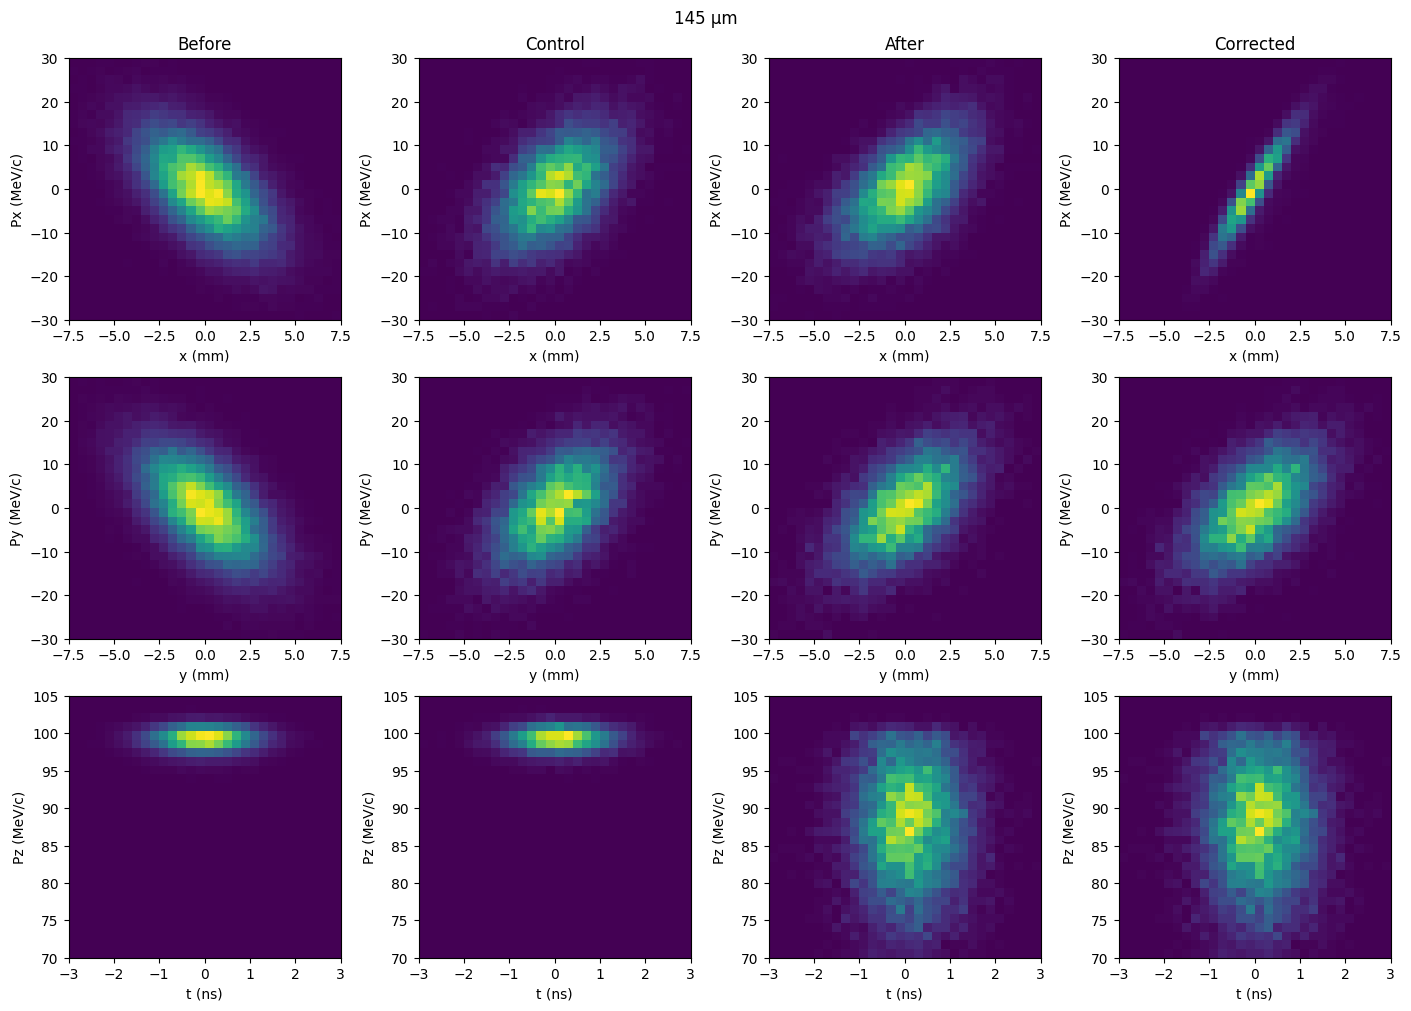

In [226]:
# Make some phase space plots
PLOT_AXES = [("x", "Px"), ("y", "Py"), ("t", "Pz")]
PLOT_LABELS = [("x (mm)", "Px (MeV/c)"), ("y (mm)", "Py (MeV/c)"), ("t (ns)", "Pz (MeV/c)")]
PLOT_RANGES = [
    [[-7.5, 7.5], [-30, 30]],
    [[-7.5, 7.5], [-30, 30]],
    [[-3, 3], [70, 105]]
]
fig, axes = plt.subplots(nrows = len(PLOT_AXES), ncols = len(PLOT_TARGETS), layout="constrained")
fig.set_size_inches(14, 10)
for i, df in enumerate(PLOT_TARGETS):
    axes[0][i].set_title(PLOT_TITLES[i])
    for j, ((xaxis, yaxis), (xlabel, ylabel), ranges) in enumerate(zip(PLOT_AXES, PLOT_LABELS, PLOT_RANGES)):
        ax = axes[j][i]
        ax.hist2d(df[xaxis], df[yaxis], bins=30, range=ranges)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
fig.suptitle(f"{t_emit*1000:.0f} μm")

In [227]:
for x in PLOT_TARGETS:
    df_calc(x)

Text(0.5, 0.98, '145 μm')

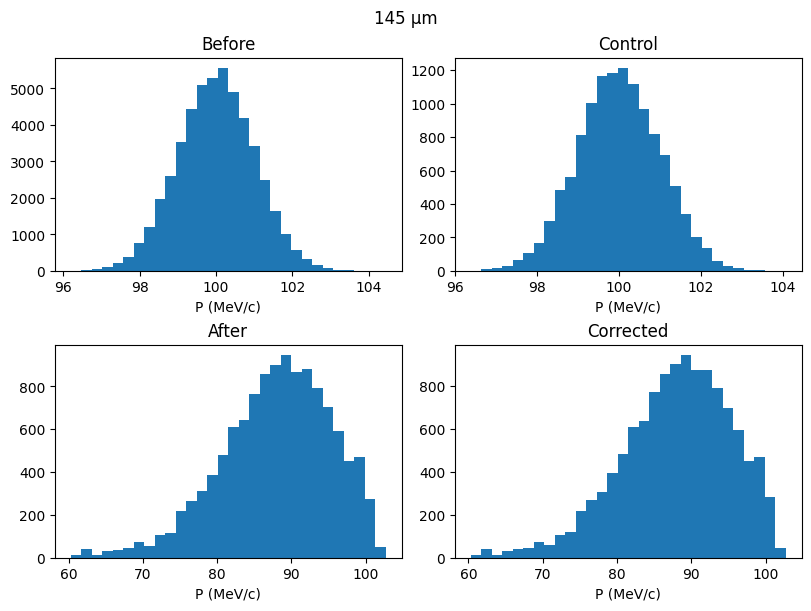

In [228]:
fig, axes = plt.subplots(nrows=2, ncols=2, layout="constrained")
fig.set_size_inches(8, 6)
axes = axes.flatten()
for ax, df, title in zip(axes, PLOT_TARGETS, PLOT_TITLES):
    ax.hist(df["P"], bins=30)
    ax.set_title(title)
    ax.set_xlabel("P (MeV/c)")
fig.suptitle(f"{t_emit*1000:.0f} μm")

In [235]:
print_all_params(cut_outliers(after, sigma=3.5))

-----------------------------
Twiss parameters for X
emit  = 0.040835500749160356 mm
beta  = 0.03710768105280395 m
gamma = 202.54680421626023 1/m
alpha = -2.5526539540489446
D     = 0.0193372676652415 m
D'    = -0.05665438738588908

Twiss parameters for Y
emit  = 0.14812978840848035 mm
beta  = 0.02508015419975112 m
gamma = 57.6311713000497 1/m
alpha = -0.6673819468022171
D     = 4.845159560785752e-05 m
D'    = -0.0019043022416359

Z-emittance:  6.393719958391665 mm
Z std: 141.84165612897152 mm
pZ std: 7.452264486112231 MeV/c
Mean momentum: 88.03167592240798 MeV/c
-----------------------------


## Effect of cuts

This quickly shows the effect based on a previously generated `after`

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 83.63it/s]


Text(0, 0.5, 'Cut percent')

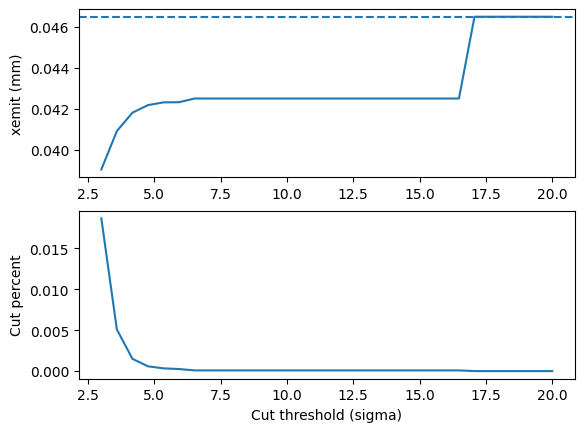

In [248]:
cuts = np.linspace(3, 20, 30)
orig = emittances(after)[0]
emits = list()
percents = list()
for c in tqdm(cuts):
    afterafter = cut_outliers(after, sigma=c)
    emits.append(emittances(afterafter)[0])
    percents.append(1-len(afterafter)/12000)
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.axhline(orig, linestyle="--")
ax1.plot(cuts, emits)
ax2.plot(cuts, percents)
ax2.set_xlabel("Cut threshold (sigma)")
ax2.set_ylabel("Cut threshold (sigma)")
ax1.set_ylabel("xemit (mm)")
ax2.set_ylabel("Cut percent")

# Random chance

In [218]:
# Values to use
angle = 48.42
length = 7
t_emit = 0.145
momentum = 100
alpha = 0.7
beta = 0.030
pz_std = 1
l_emit = 1
vd_dist = 24

# Number of trials
N = 300

In [219]:
# Run simulations
results = list()
for _ in trange(N):
    before = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    after = run_distribution(before, length, angle, vd_dist)
    results.append(after)
with open("results/variability_study.pkl", "wb+") as file:
    pickle.dump(results, file)
beep()

100%|██████████████████████████████████████████████████████████████████████████████| 300/300 [1:00:38<00:00, 12.13s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:03<00:00, 92.22it/s]


(0.04158235529699486, 0.0005664501262311824)

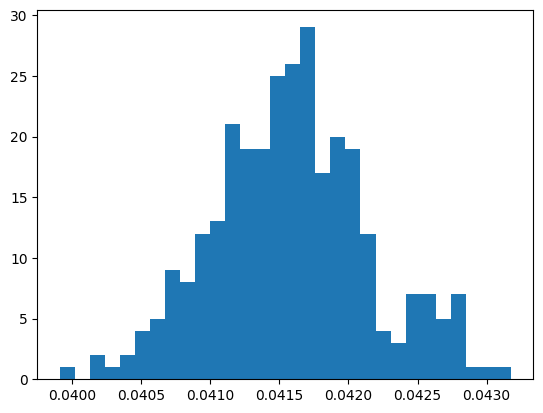

In [222]:
xemits = [emittances(cut_outliers(after, sigma=3.5))[0] for after in tqdm(results)]
plt.hist(xemits, bins=30)
np.mean(xemits), np.std(xemits)